In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import math

import pickle
import os

In [2]:
np.random.seed(10)

#network configuraiton
v_size = 21
h_size = 50

In [3]:
import mnist_utils as mu
train_x, train_y = mu.get_train_data()
train_x /=255.
v_size = 784
h_size = 500

In [4]:
#weights initialization
w_bound = 0.3
w_init = 0.1
w = np.random.uniform(-w_init, w_init, (v_size, h_size)) 

#LIF neuron parameters
v_thresh = 1.   # membrane potential threshold
v_rest = 0.     # resting potential
tau_m = 20.     # membrane constant
delay = 5       # synaptic delay

#STDP config
tau_stdp = 20   # STDP window length
eta = 0.0005  # learning rate
delta_w = eta*np.logspace(0,1,tau_stdp)  #expenential decaying STDP curve



run_len = 50      # Length of each trial
teach_delay = 10  # Delay length of the teaching signal

record_flag = False

In [5]:
# # Setting up the patterns to learn
# patterns = list()
# # patterns.append([3,3,3,3,5,5,5,5,8,8,3,3,3,3,5,5,5,5,8,8])
# # patterns.append([2,2,2,2,2,8,8,8,8,8,2,2,2,2,2,8,8,8,8,8])
# patterns.append([2,2,2,2,2,2,2,2,2,2,2,2,2,2,16,16,16,16,16,16,16]) #1,1,0 #16,16,16,16,16,16,16   #8,8,8,8,8,8,8
# patterns.append([2,2,2,2,2,2,2,16,16,16,16,16,16,16,2,2,2,2,2,2,2]) #1,0,1
# patterns.append([16,16,16,16,16,16,16,2,2,2,2,2,2,2,2,2,2,2,2,2,2]) #0,1,1

# patterns = np.array(patterns)

In [6]:
K = 30.
patterns = np.int16(np.floor((1.-train_x[:2])*K ))

9


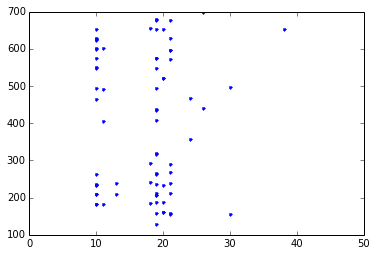

0.0501360544218


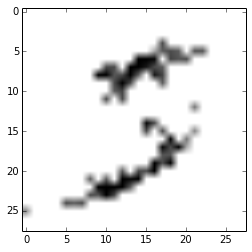

9


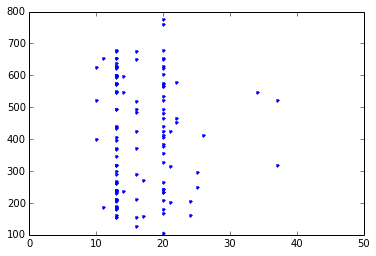

0.0554350907029


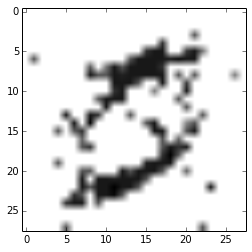

19


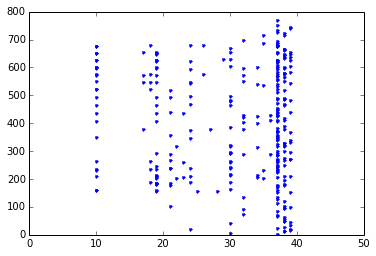

0.0235558390023


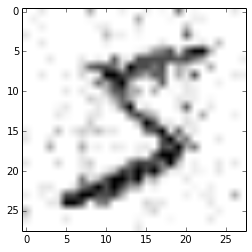

19


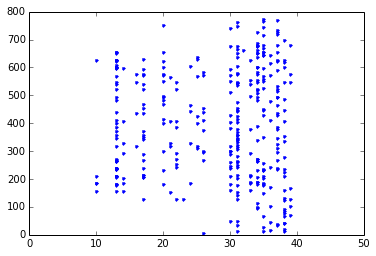

0.0680753968254


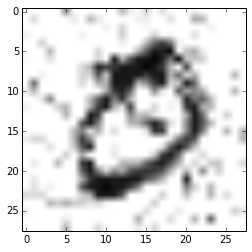

29


0.0150198412698


29


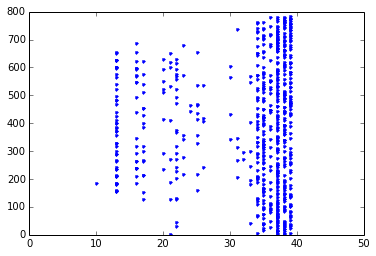

0.097322845805


39


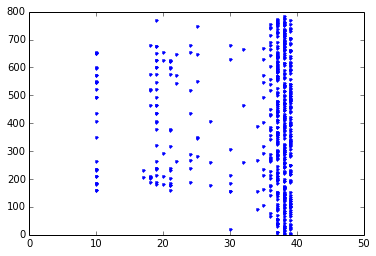

0.0146301020408


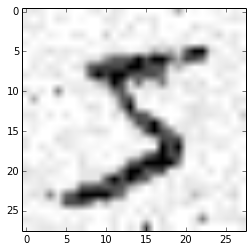

39


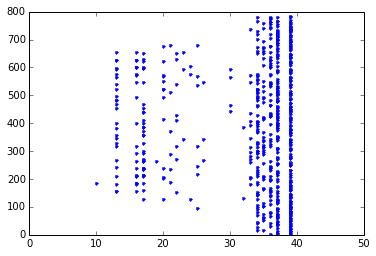

0.0818735827664


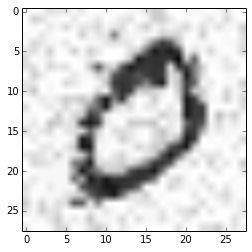

49


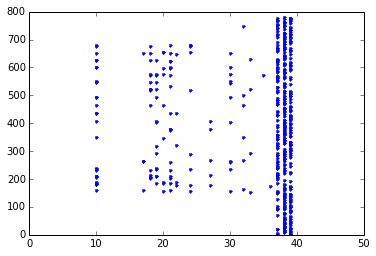

0.0130980725624


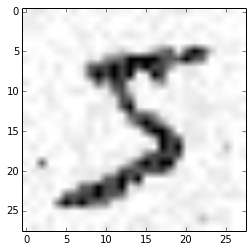

49


0.0923086734694


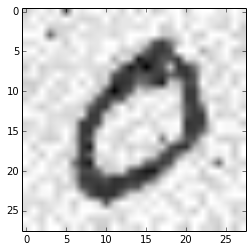

59


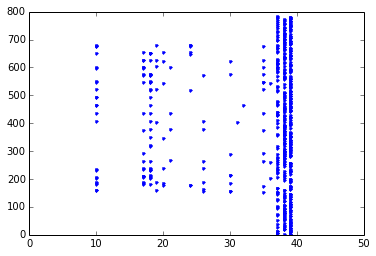

0.0104861111111


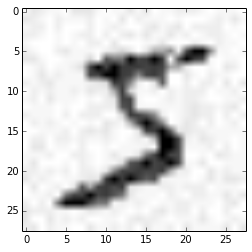

59


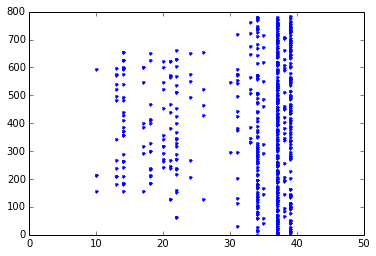

0.0989328231293


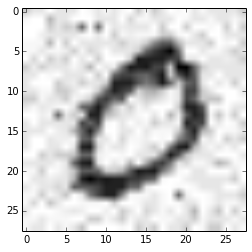

69


0.0102253401361


69


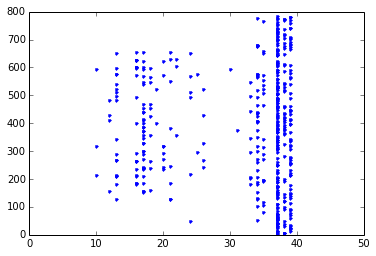

0.090660430839


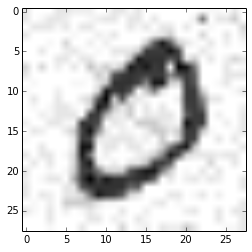

79


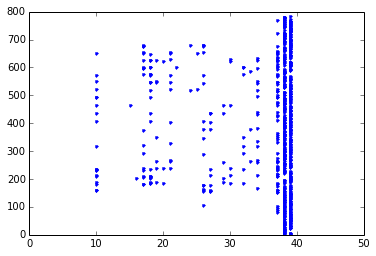

0.0122278911565


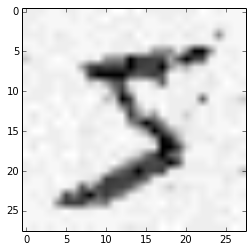

79


0.101913265306


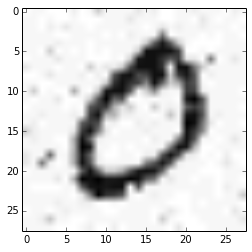

89


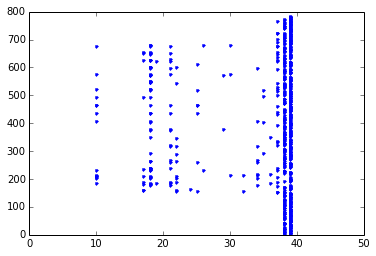

0.00904336734694


89


0.104759070295


99


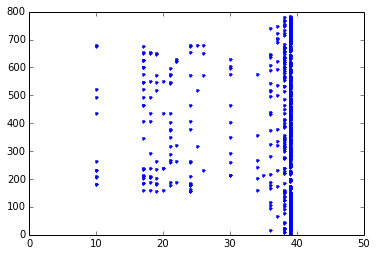

0.0143764172336


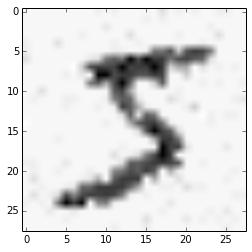

99


0.0891737528345


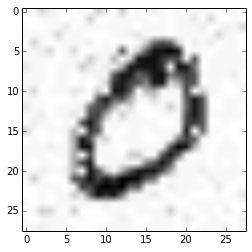

109


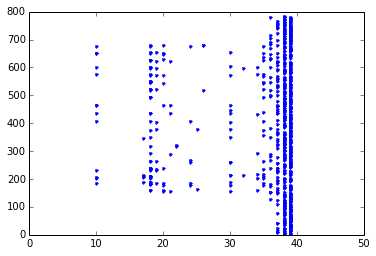

0.0110671768707


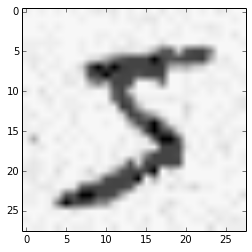

109


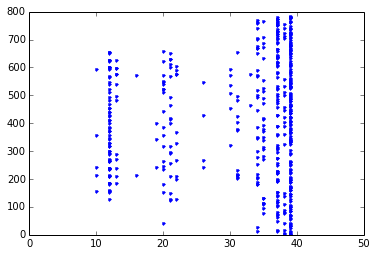

0.110907029478


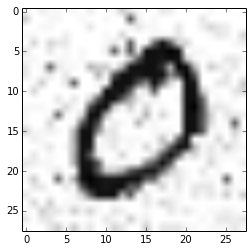

119


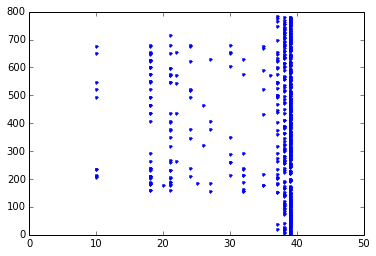

0.0136536281179


119


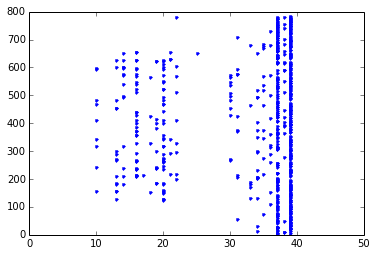

0.0998696145125


129


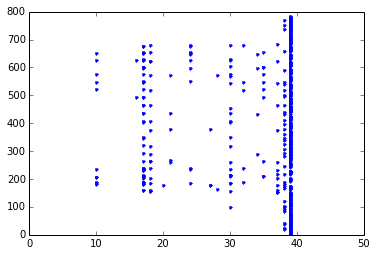

0.0128259637188


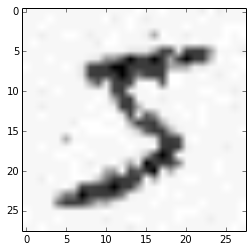

129


0.0988676303855


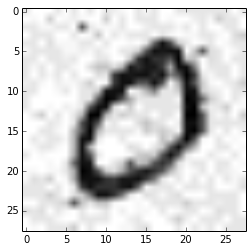

139


0.014375


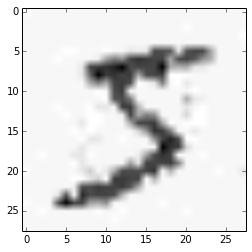

139


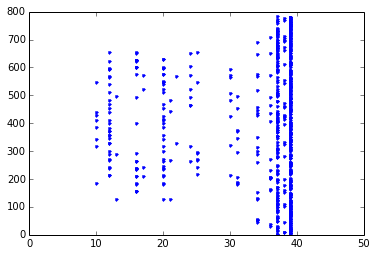

0.100201247166


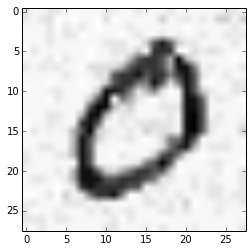

149


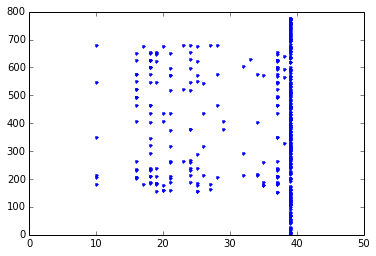

0.00922619047619


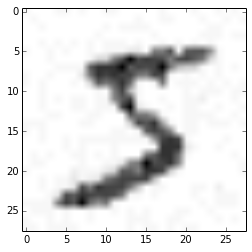

149


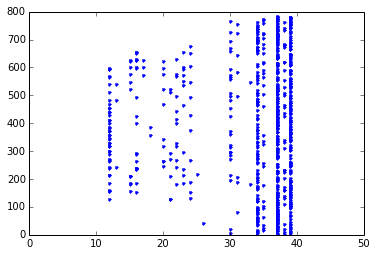

0.114306972789


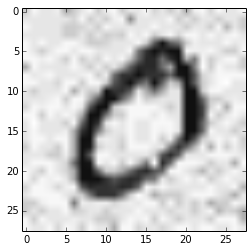

159


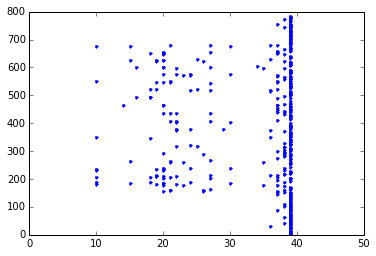

0.0197463151927


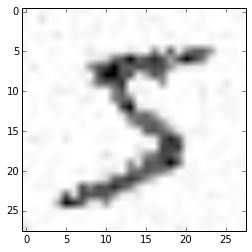

159


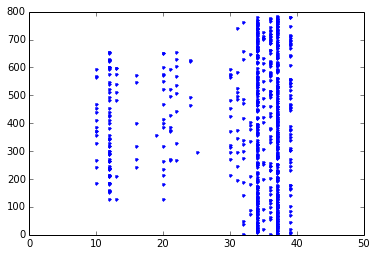

0.122283163265


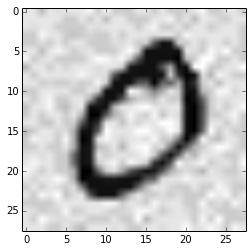

169


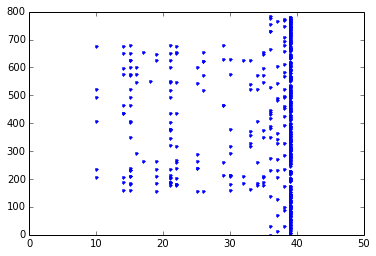

0.0156575963719


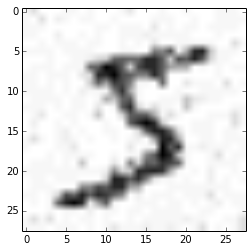

169


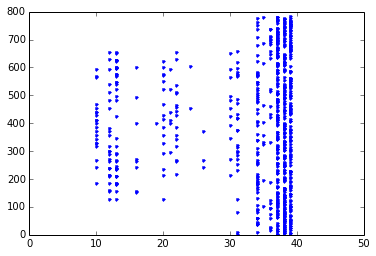

0.117074829932


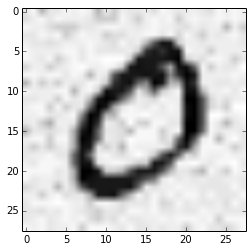

179


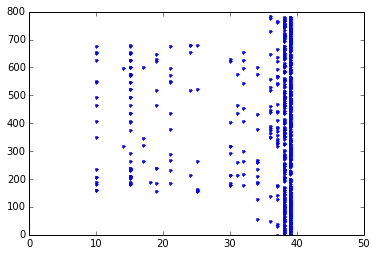

0.00849914965986


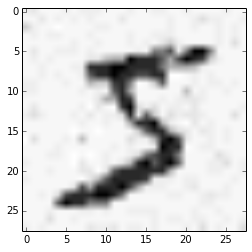

179


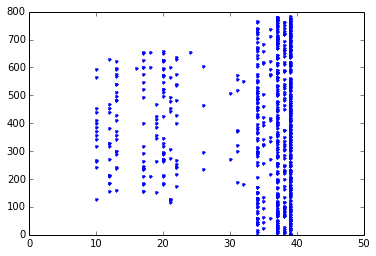

0.12639739229


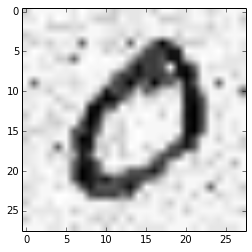

189


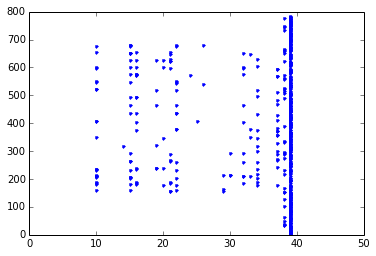

0.0103755668934


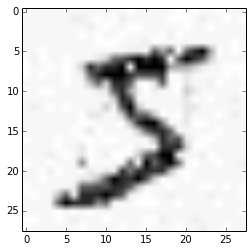

189


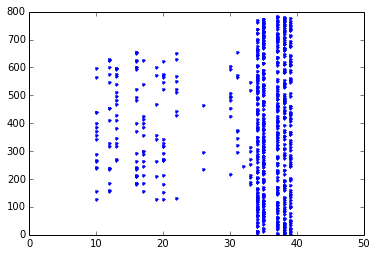

0.11101899093


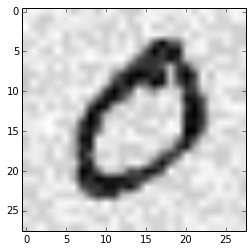

199


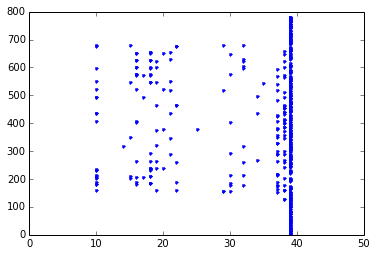

0.00876558956916


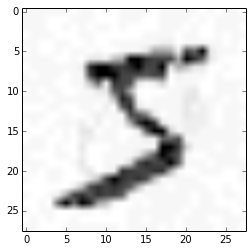

199


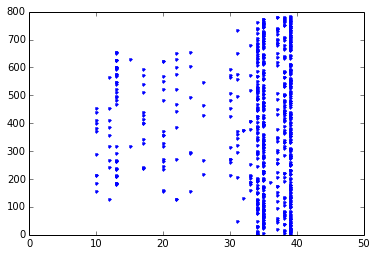

0.0963959750567


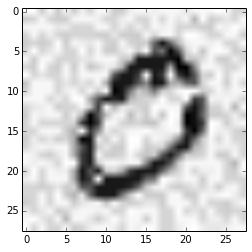

209


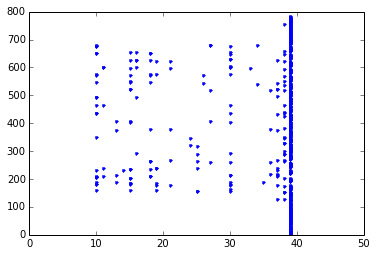

0.0132823129252


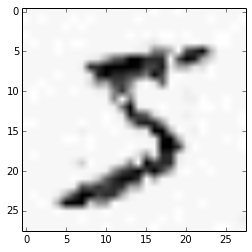

209


0.0975368480726


219


0.0102777777778


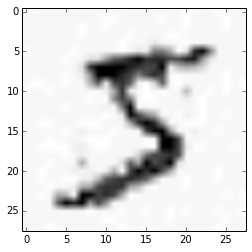

219


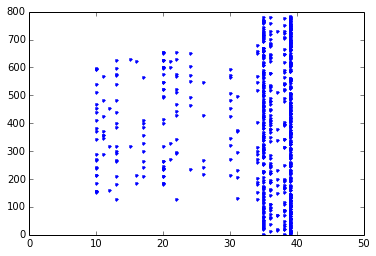

0.110921201814


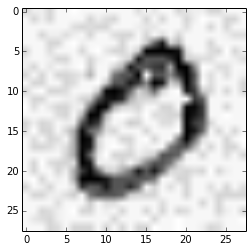

229


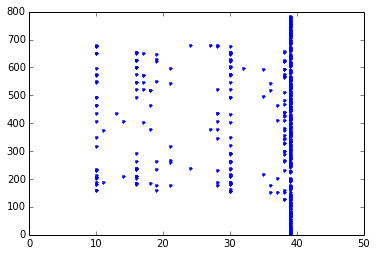

0.00705640589569


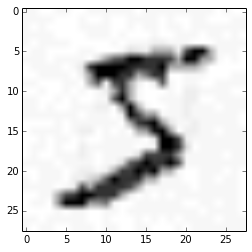

229


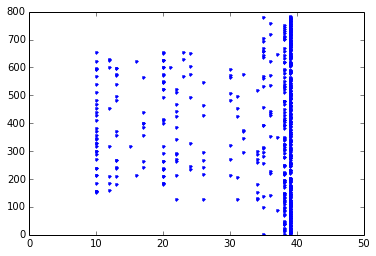

0.109863945578


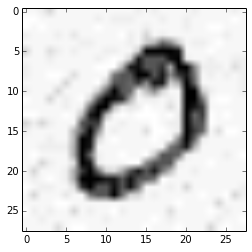

239


0.0119770408163


239


0.111804138322


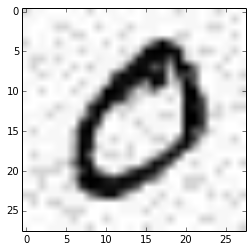

249


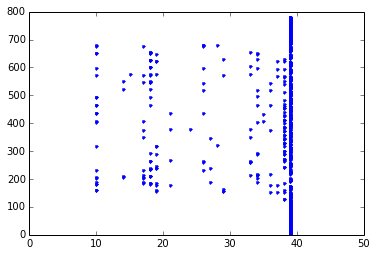

0.0106901927438


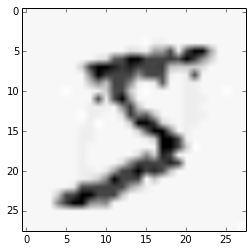

249


0.113531746032


259


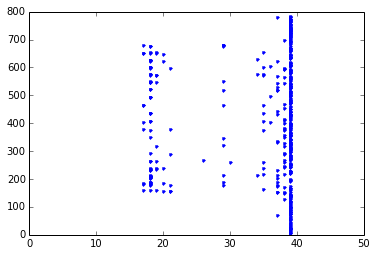

0.0161366213152


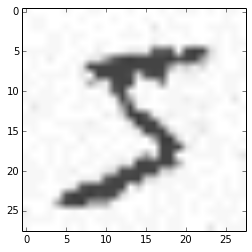

259


0.12139739229


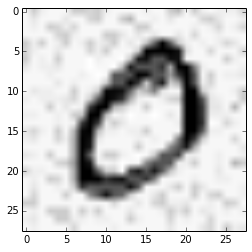

269


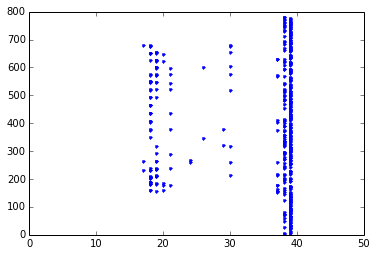

0.0137315759637


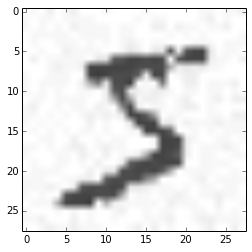

269


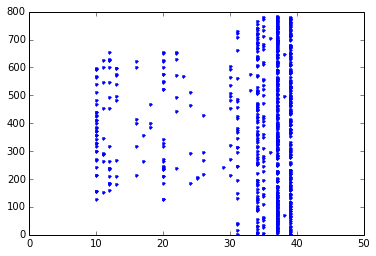

0.122141439909


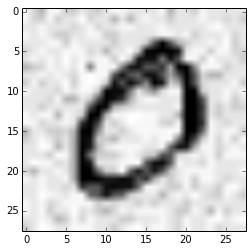

279


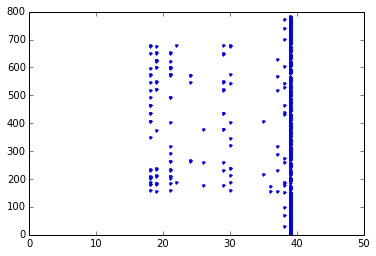

0.0201743197279


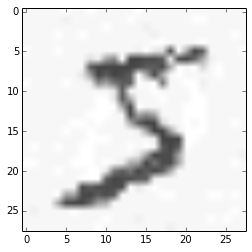

279


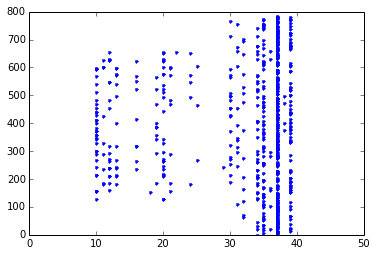

0.115080782313


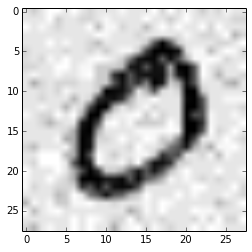

289


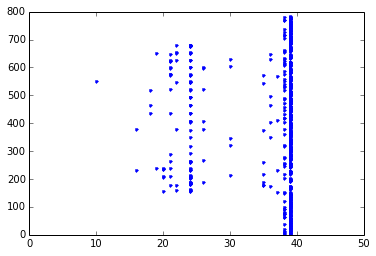

0.0229421768707


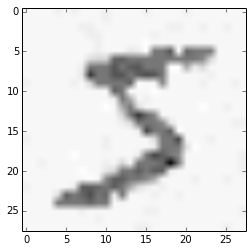

289


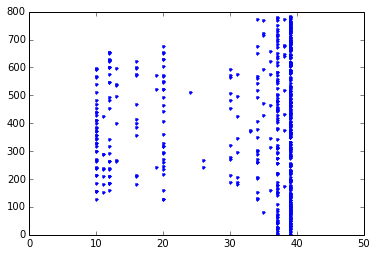

0.110753968254


299


0.01429138322


299


0.102871315193


309


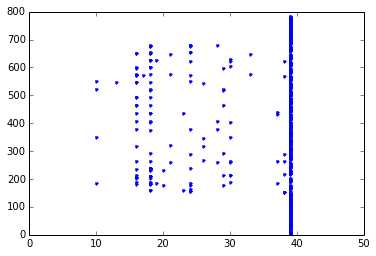

0.00913407029478


309


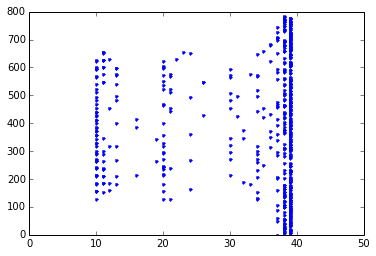

0.113506235828


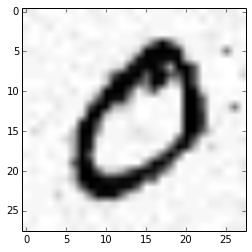

319


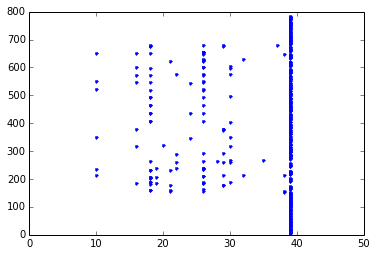

0.02945861678


319


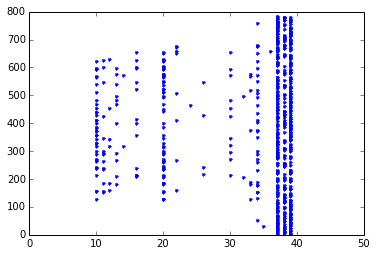

0.115001417234


329


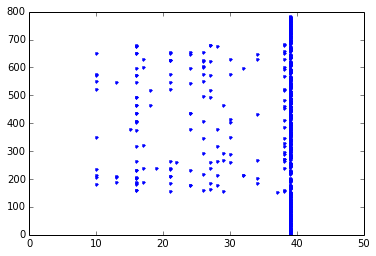

0.0194444444444


329


0.105452097506


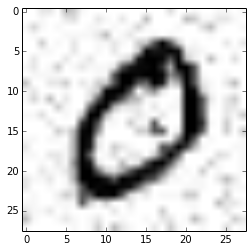

339


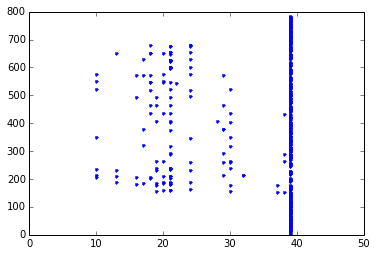

0.0145861678005


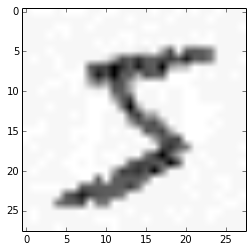

339


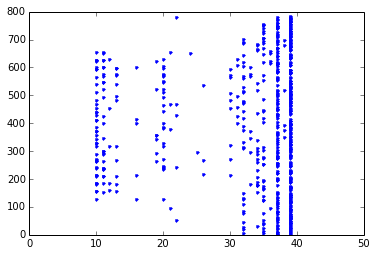

0.116478174603


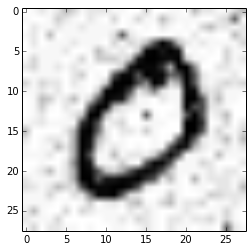

349


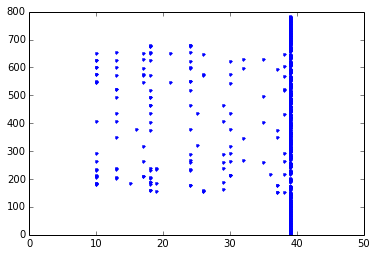

0.00886479591837


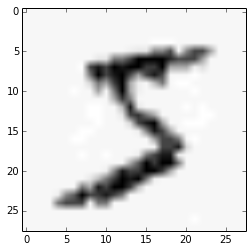

349


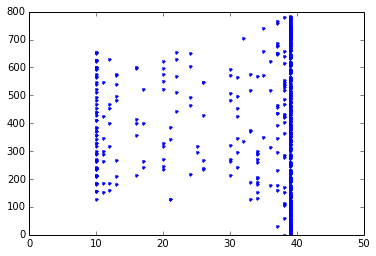

0.111989795918


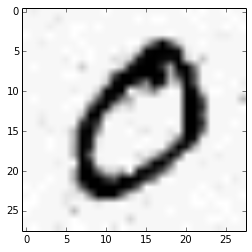

359


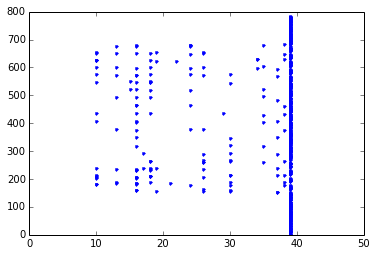

0.00893849206349


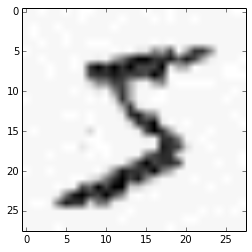

359


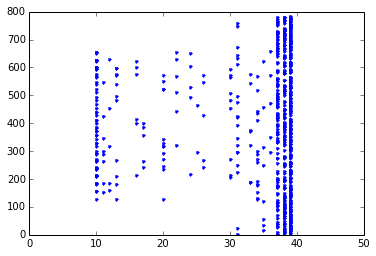

0.114216269841


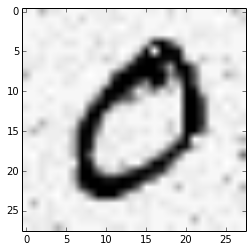

369


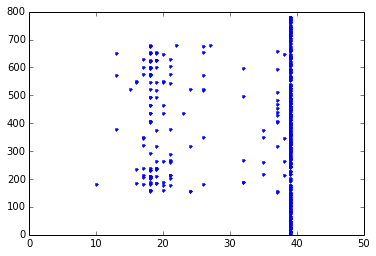

0.0106618480726


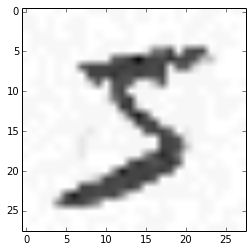

369


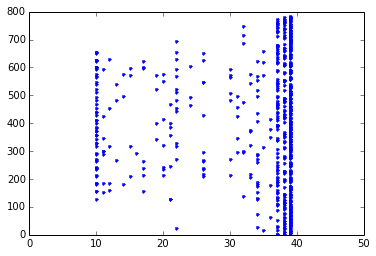

0.115024092971


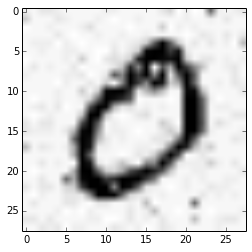

379


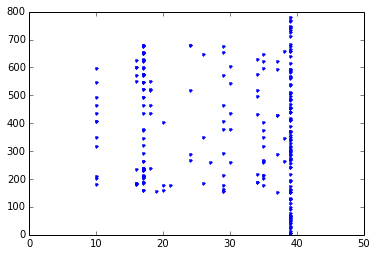

0.0077735260771


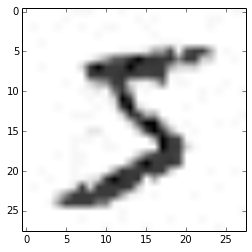

379


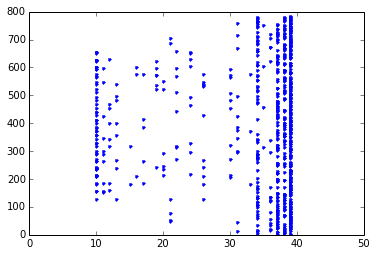

0.125124716553


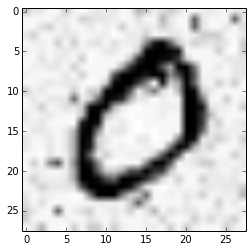

389


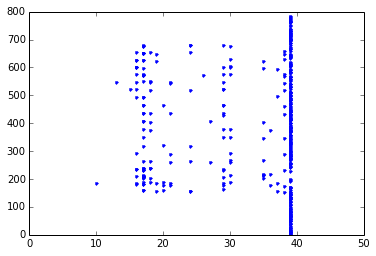

0.0120918367347


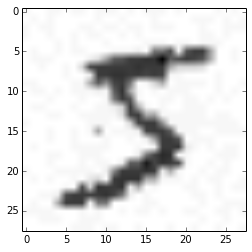

389


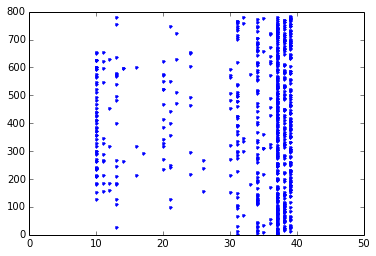

0.134674036281


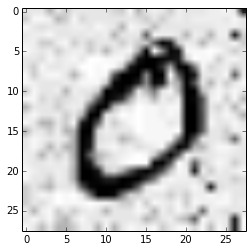

399


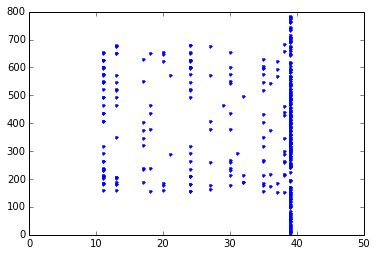

0.00867630385488


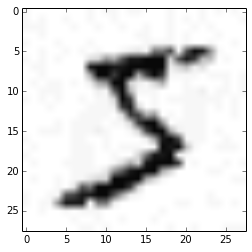

399


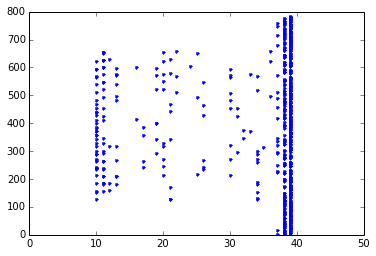

0.116757369615


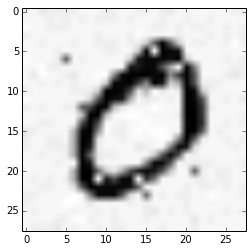

409


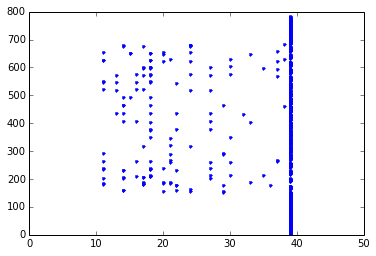

0.00610260770975


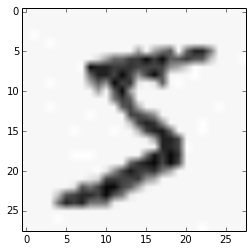

409


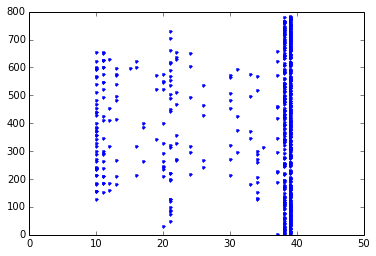

0.125847505669


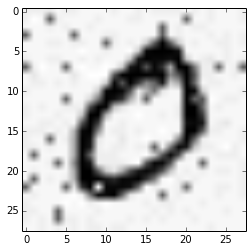

419


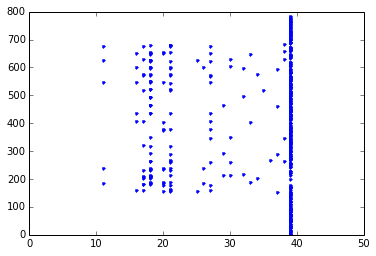

0.00766581632653


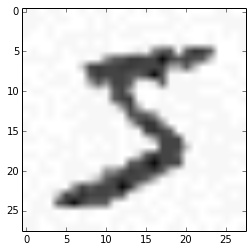

419


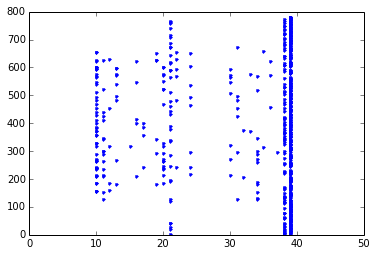

0.1310388322


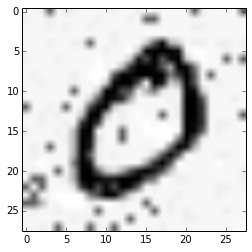

429


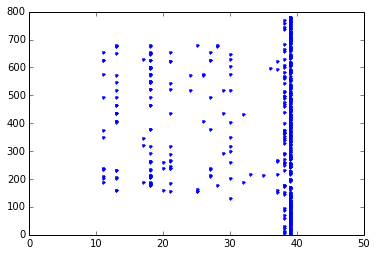

0.00668792517007


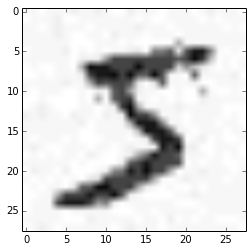

429


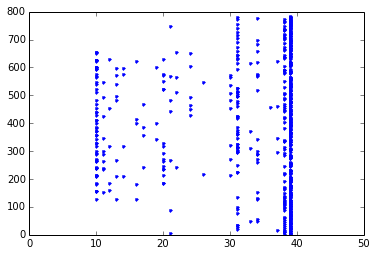

0.124730725624


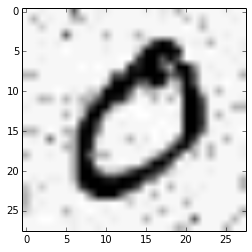

439


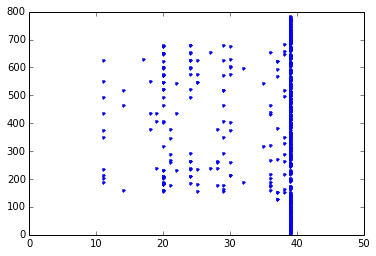

0.0171797052154


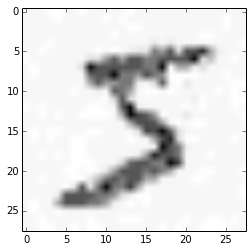

439


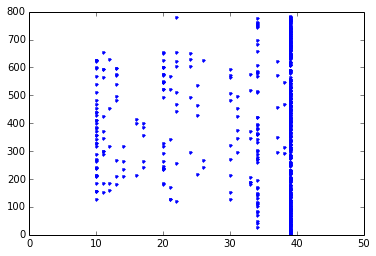

0.117735260771


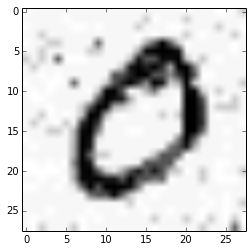

449


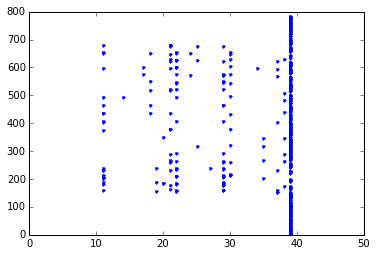

0.0177423469388


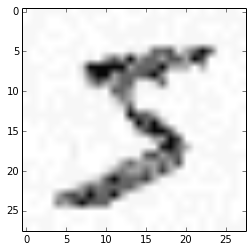

449


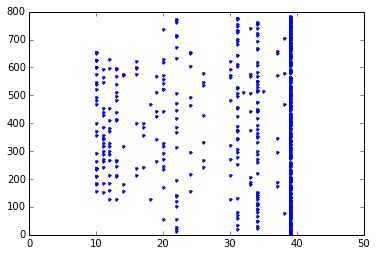

0.133778344671


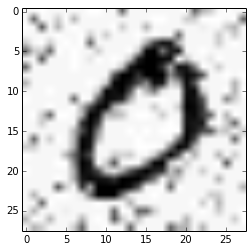

459


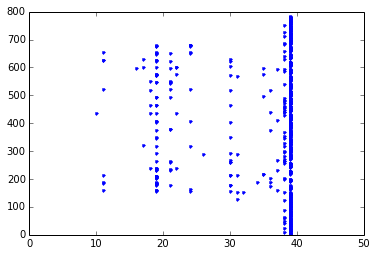

0.0117219387755


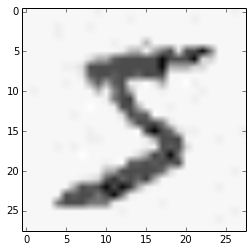

459


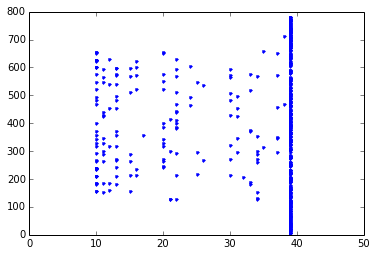

0.0992885487528


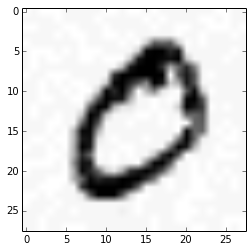

469


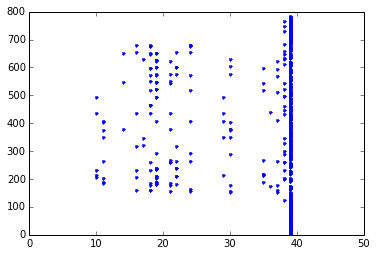

0.0107157029478


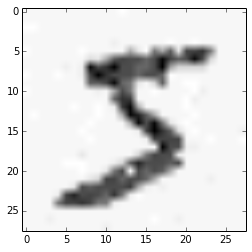

469


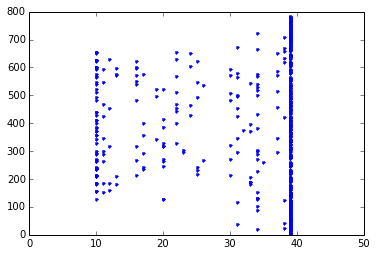

0.111053004535


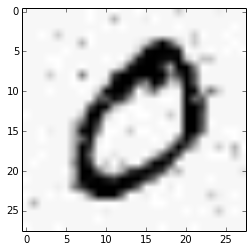

479


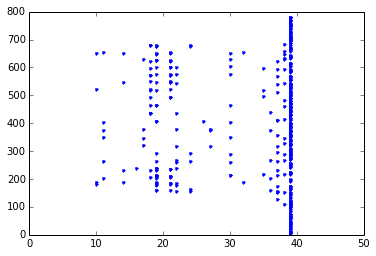

0.0113151927438


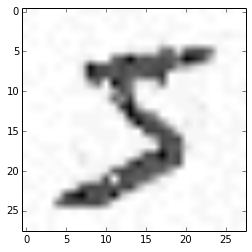

479


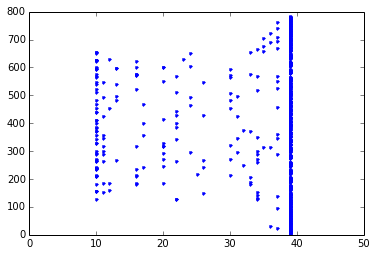

0.111755952381


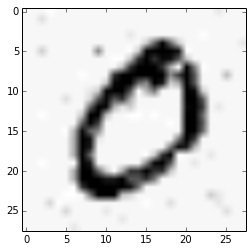

489


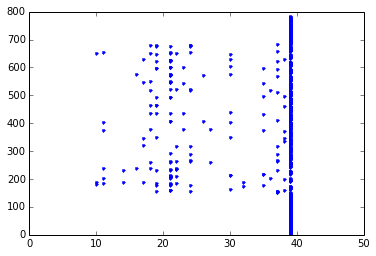

0.0125410997732


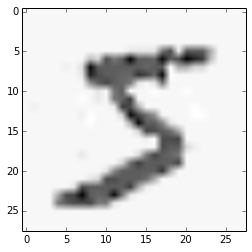

489


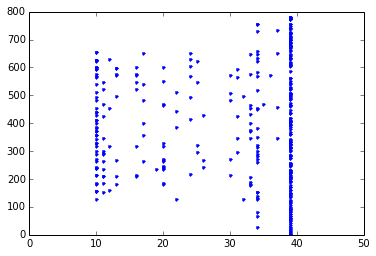

0.111945861678


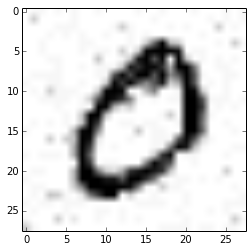

499


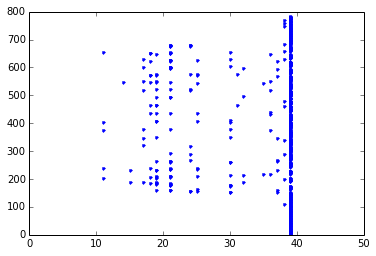

0.0143608276644


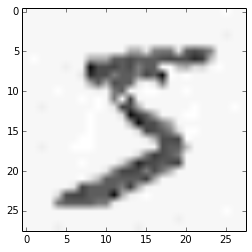

499


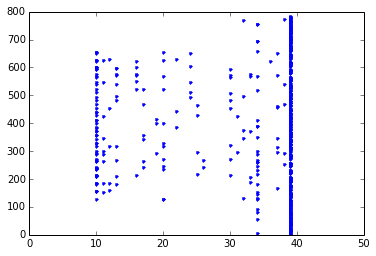

0.11281462585


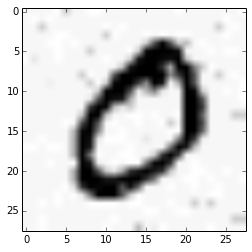

509


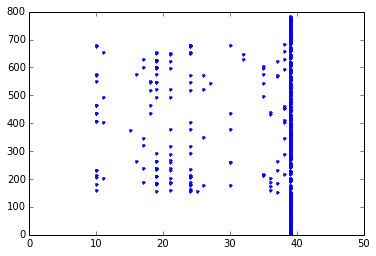

0.0123398526077


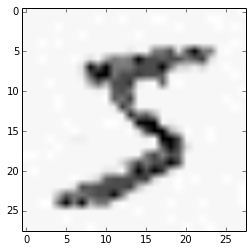

509


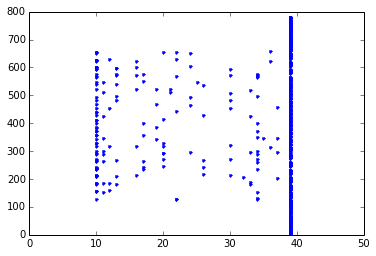

0.11006377551


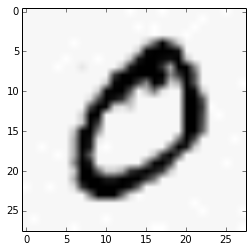

519


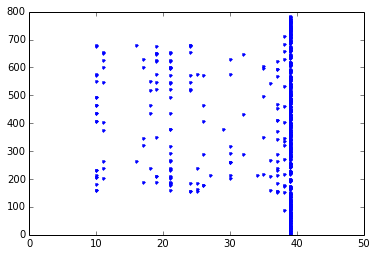

0.013914399093


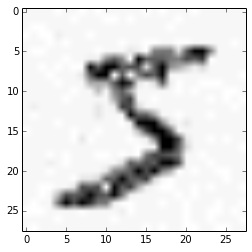

519


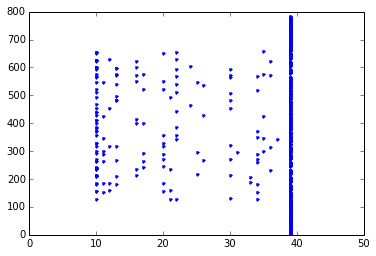

0.103969671202


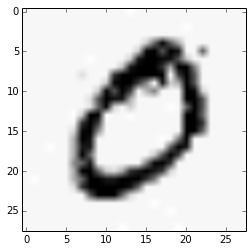

529


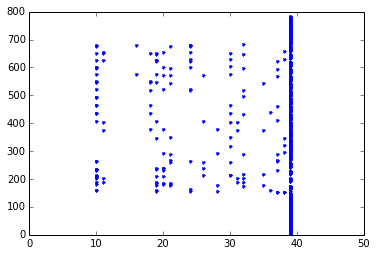

0.012181122449


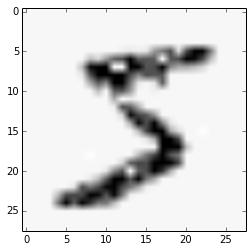

529


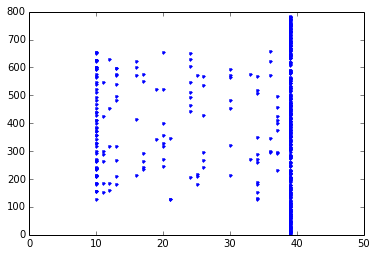

0.108412698413


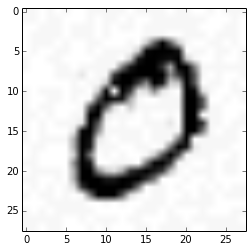

539


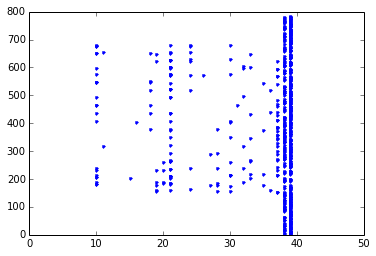

0.0163988095238


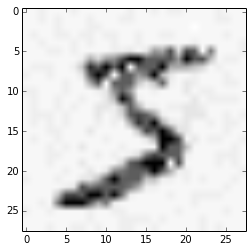

539


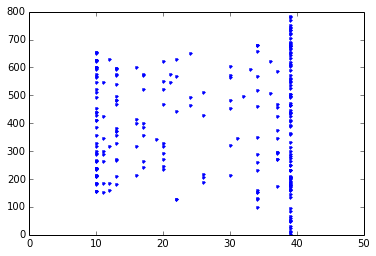

0.0999546485261


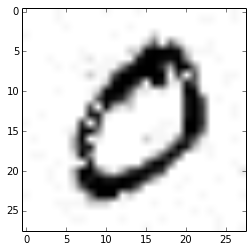

549


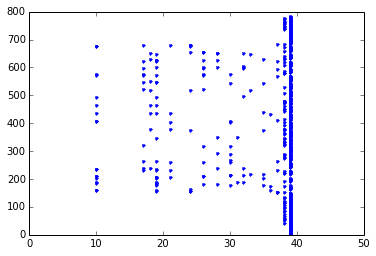

0.0236026077098


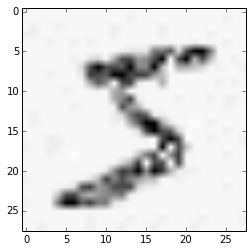

549


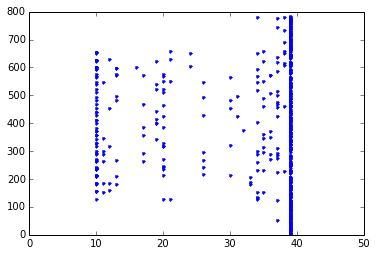

0.111775793651


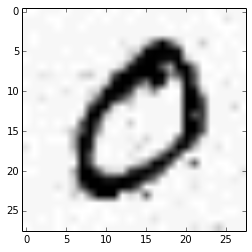

559


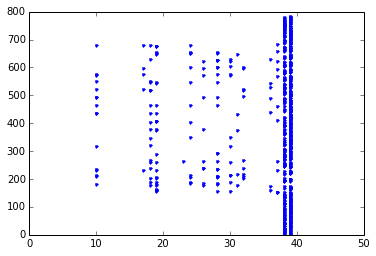

0.0238676303855


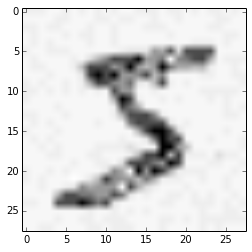

559


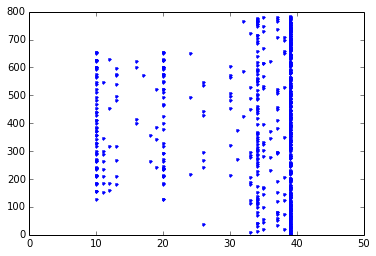

0.117599206349


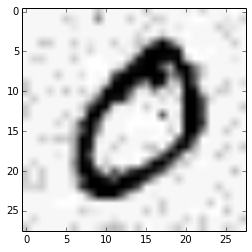

569


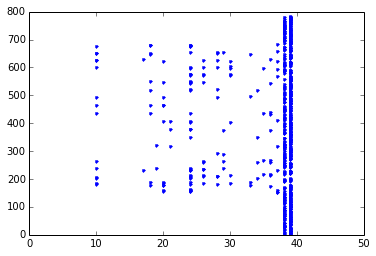

0.0264484126984


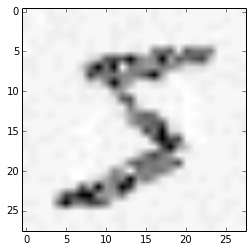

569


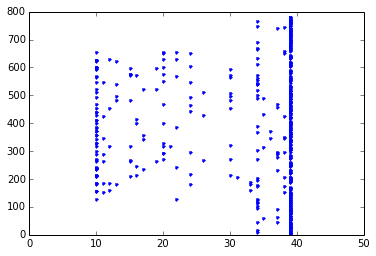

0.109982993197


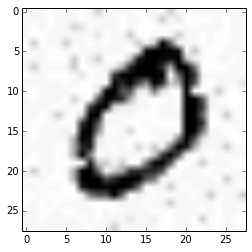

579


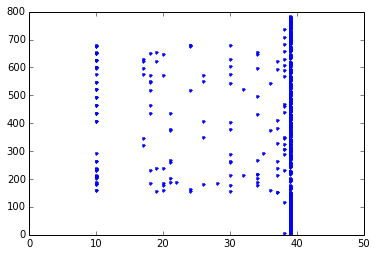

0.0159254535147


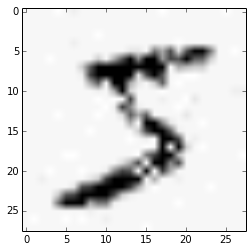

579


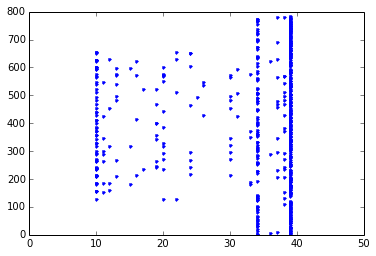

0.116490929705


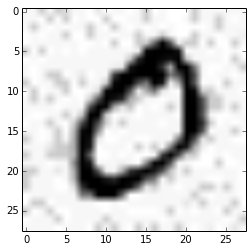

589


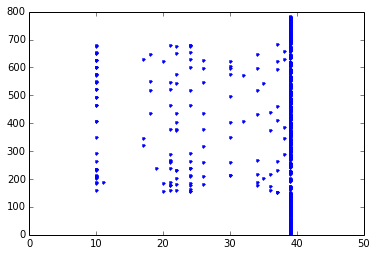

0.0193225623583


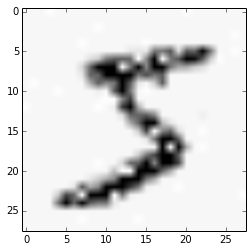

589


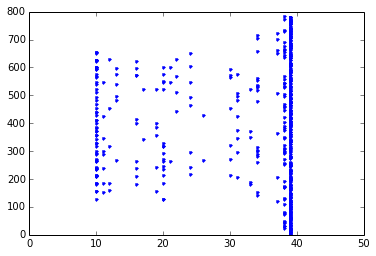

0.112076247166


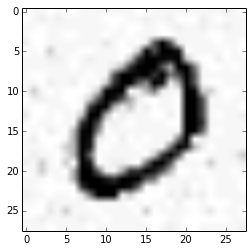

599


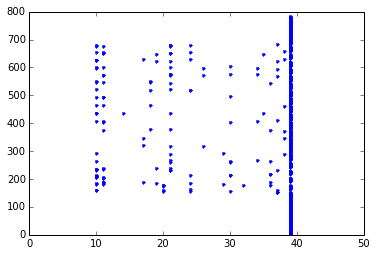

0.0163392857143


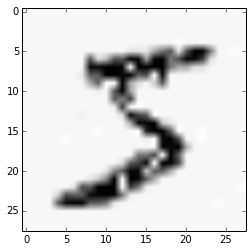

599


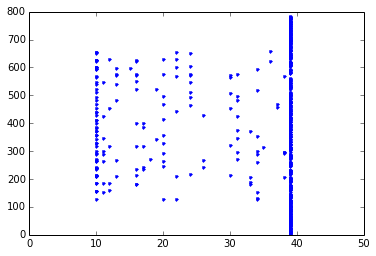

0.112220804989


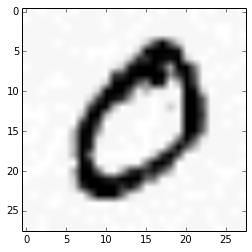

609


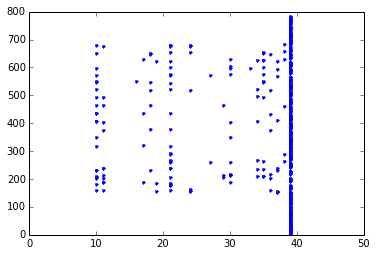

0.0346952947846


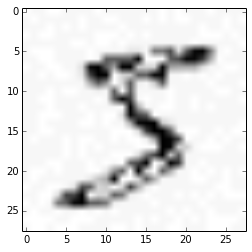

609


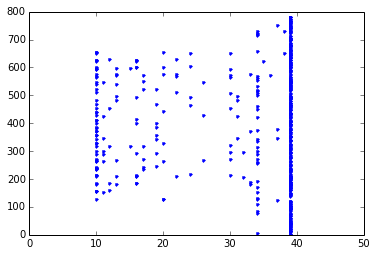

0.113146258503


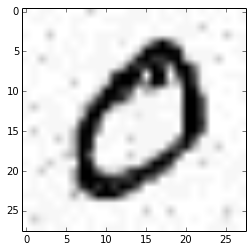

619


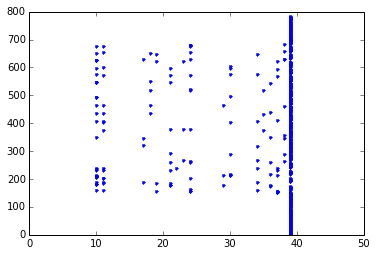

0.0336933106576


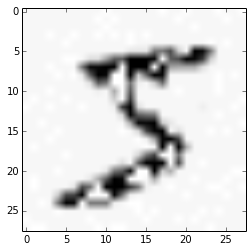

619


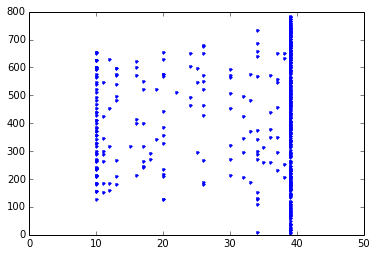

0.108190192744


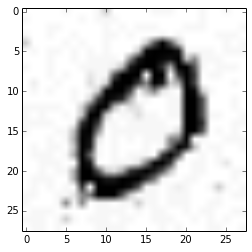

629


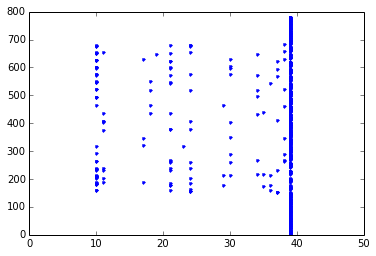

0.00854591836735


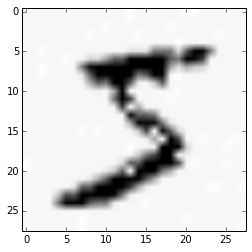

629


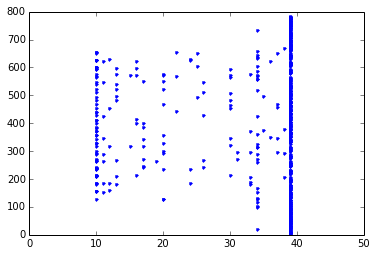

0.113517573696


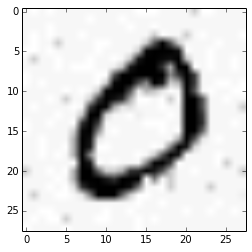

639


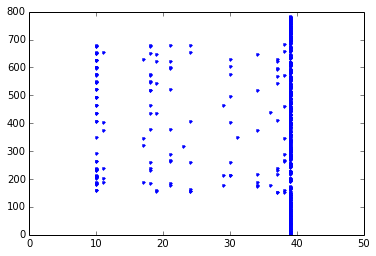

0.00704648526077


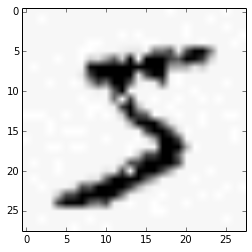

639


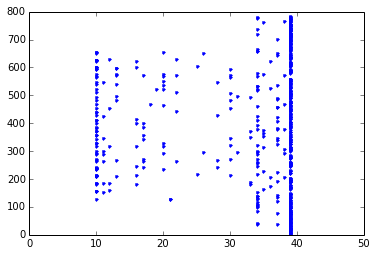

0.117349773243


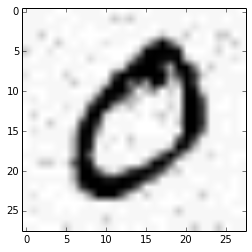

649


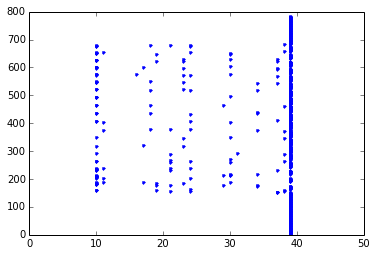

0.00525510204082


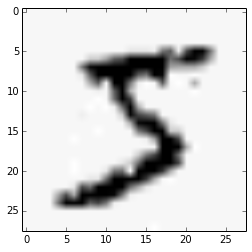

649


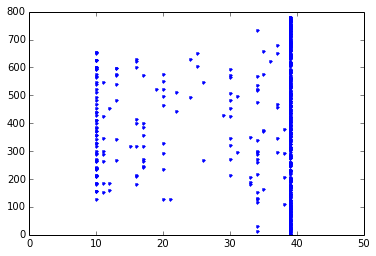

0.112181122449


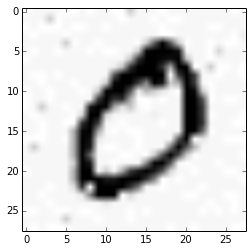

659


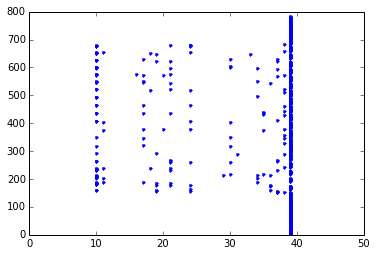

0.00301162131519


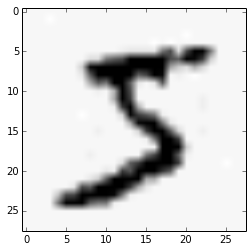

659


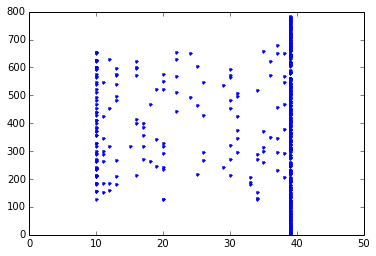

0.111488095238


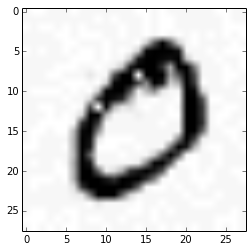

669


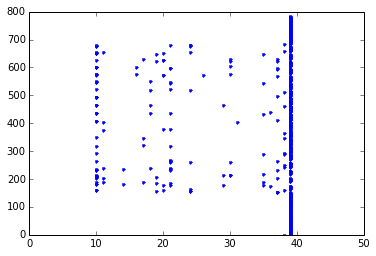

0.0118721655329


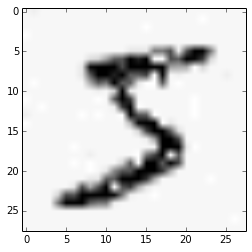

669


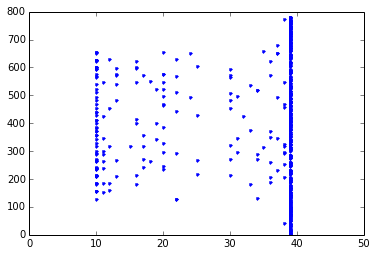

0.110273526077


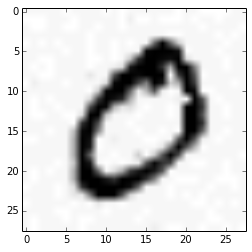

679


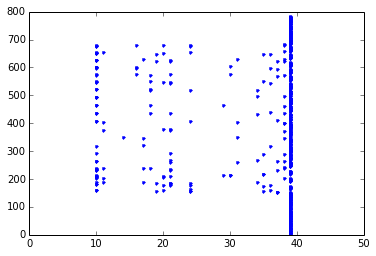

0.0065376984127


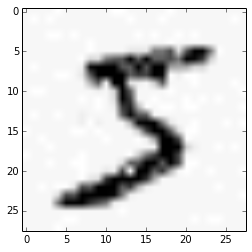

679


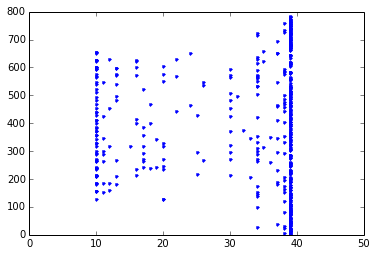

0.117232142857


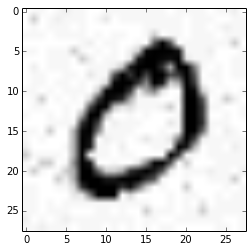

689


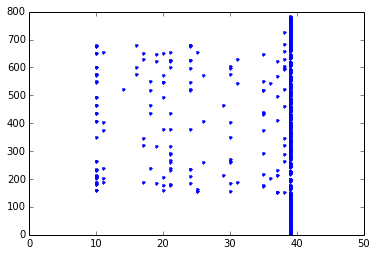

0.0106448412698


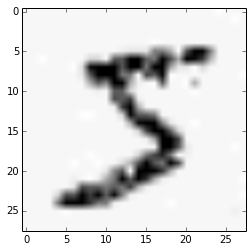

689


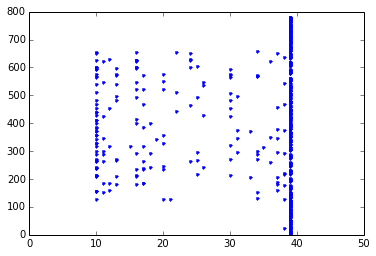

0.115613662132


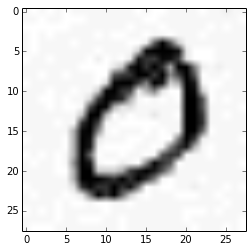

699


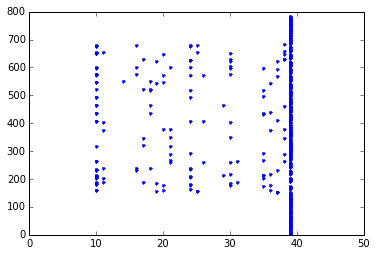

0.0124362244898


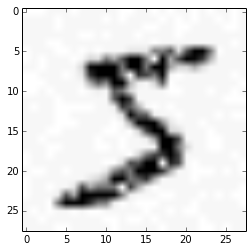

699


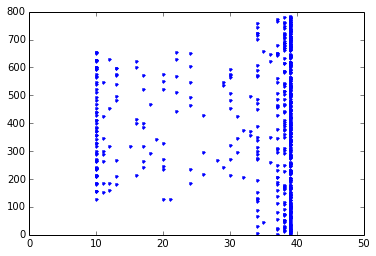

0.112940759637


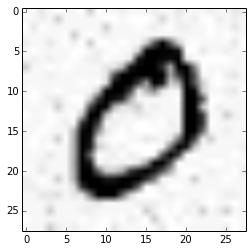

709


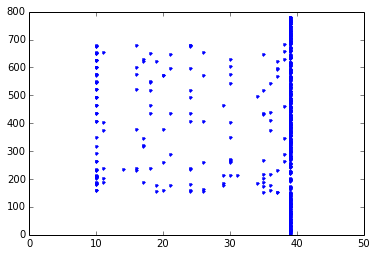

0.00410997732426


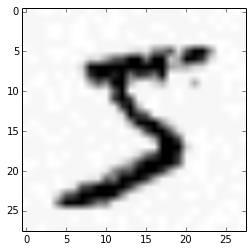

709


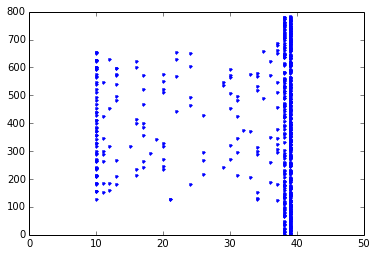

0.113448129252


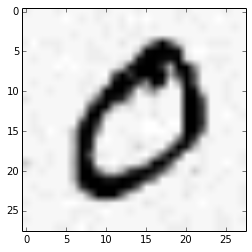

719


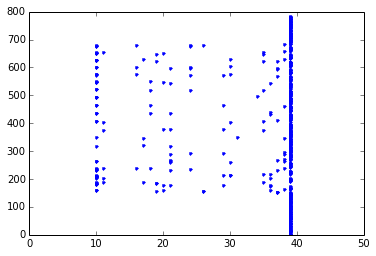

0.00596655328798


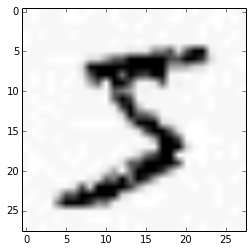

719


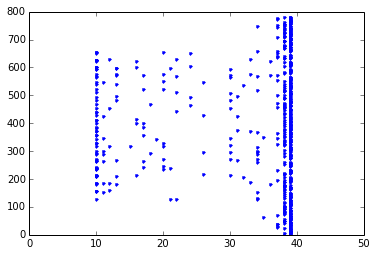

0.111675170068


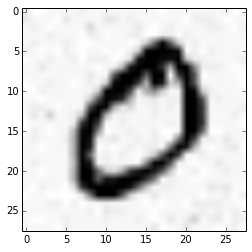

729


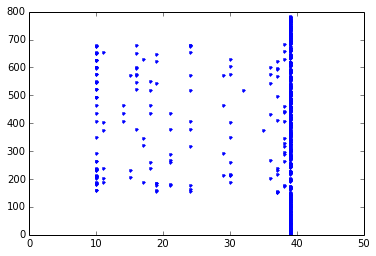

0.00540674603175


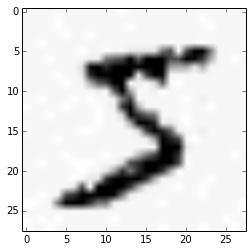

729


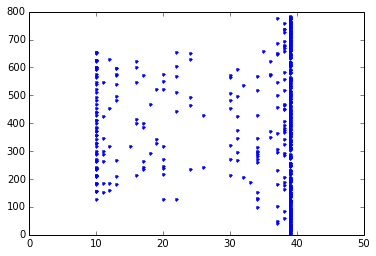

0.110950963719


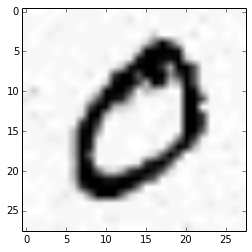

739


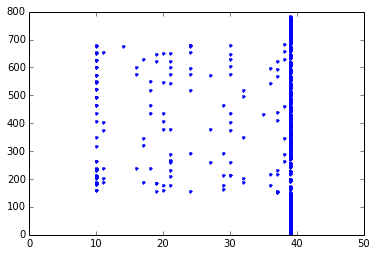

0.007429138322


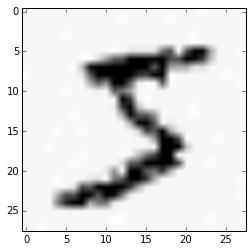

739


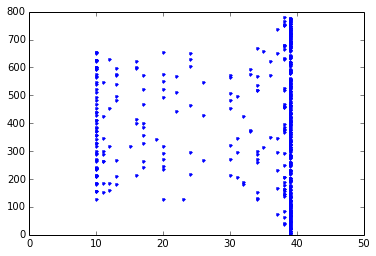

0.111374716553


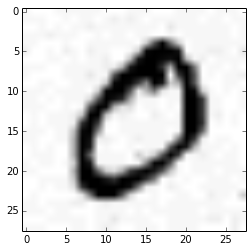

749


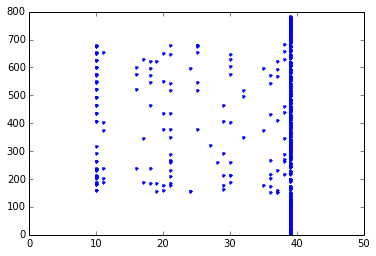

0.00689342403628


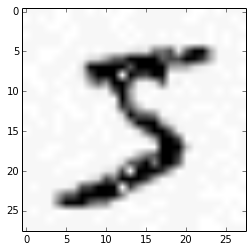

749


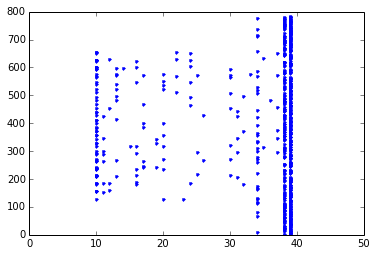

0.113316326531


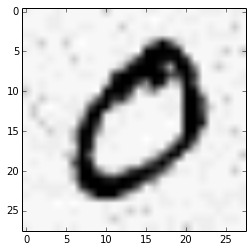

759


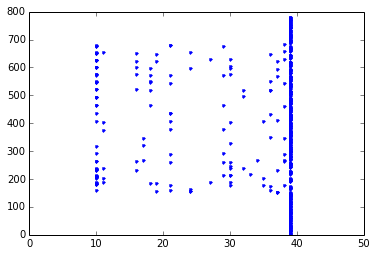

0.00863662131519


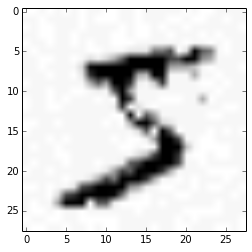

759


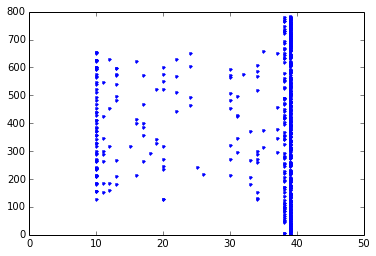

0.113412698413


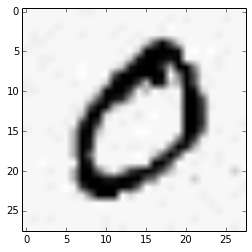

769


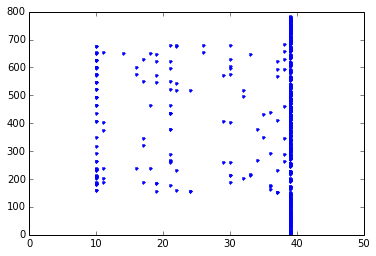

0.00499149659864


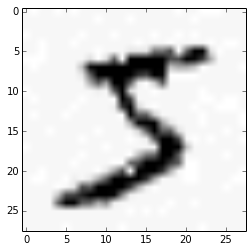

769


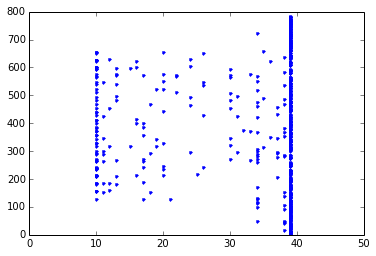

0.115505952381


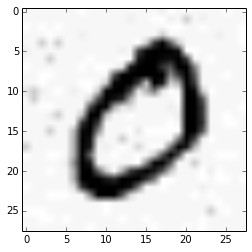

779


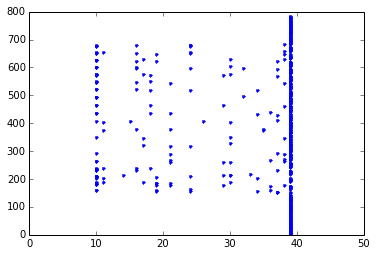

0.0037074829932


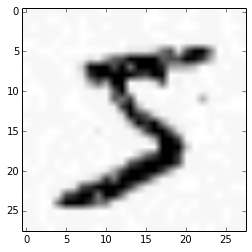

779


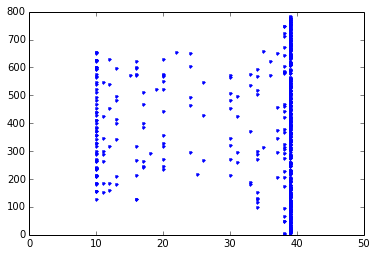

0.114810090703


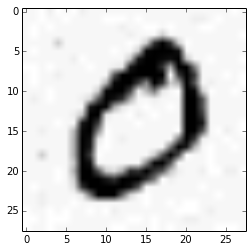

789


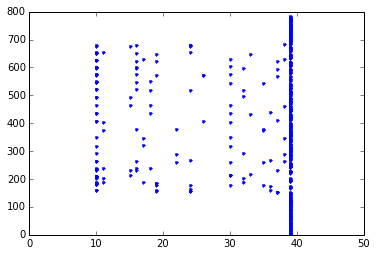

0.00194019274376


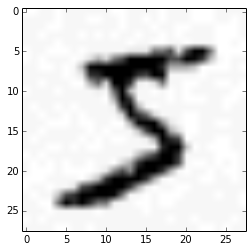

789


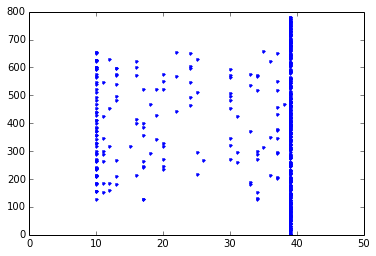

0.112363945578


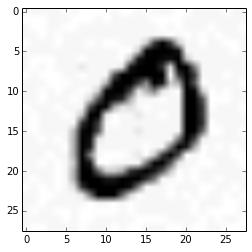

799


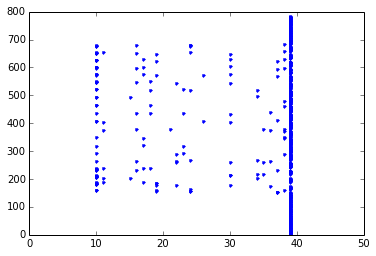

0.00465844671202


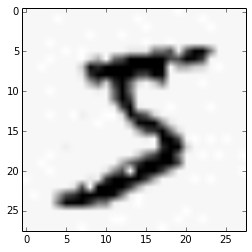

799


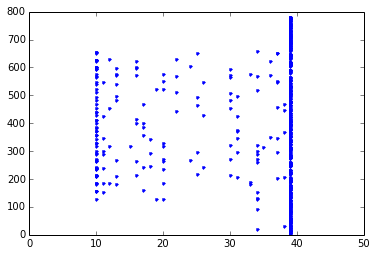

0.112403628118


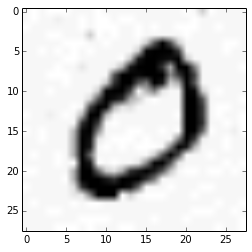

809


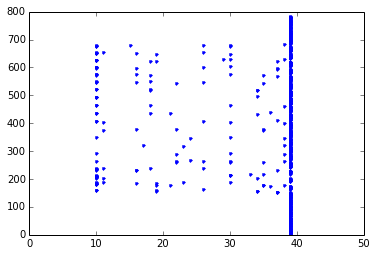

0.00608701814059


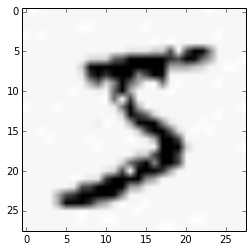

809


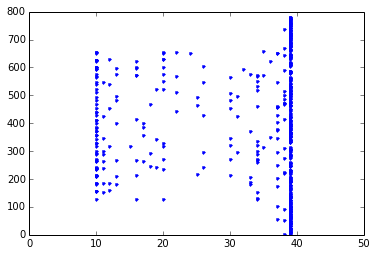

0.114102891156


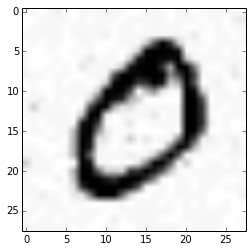

819


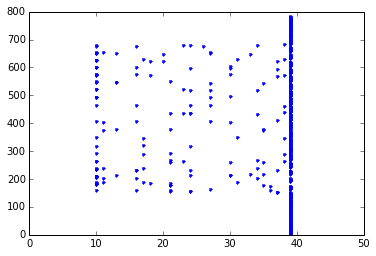

0.00530328798186


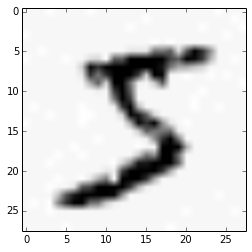

819


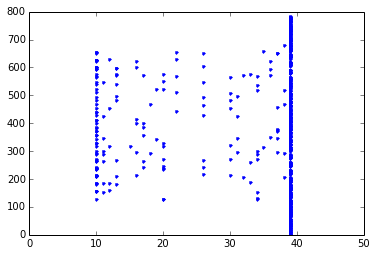

0.112718253968


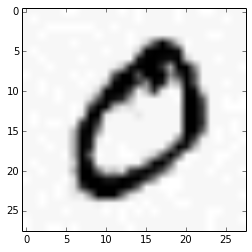

829


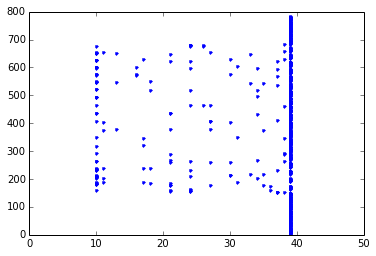

0.00680697278912


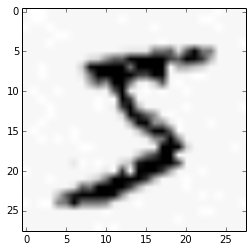

829


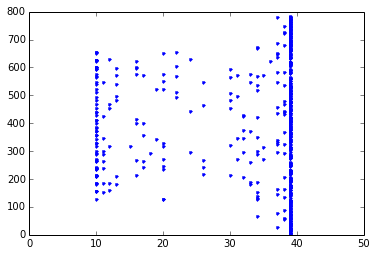

0.110625


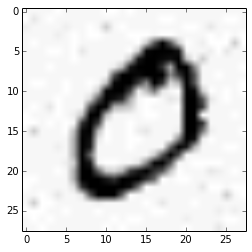

839


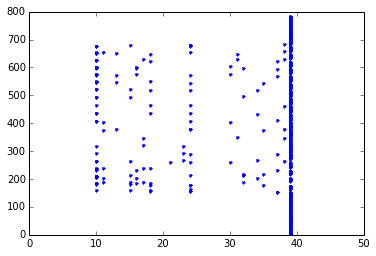

0.0111848072562


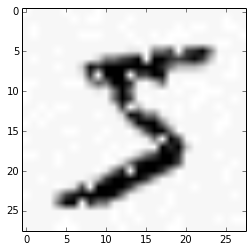

839


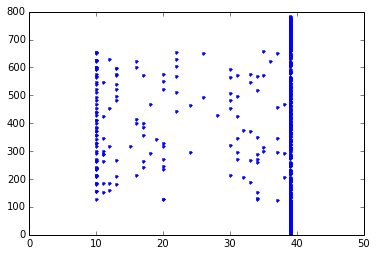

0.112759353741


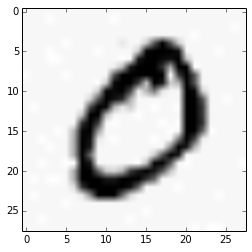

849


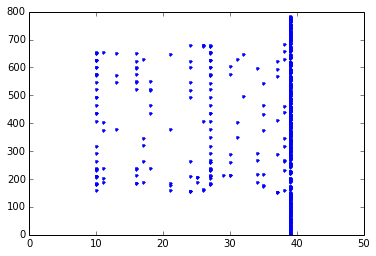

0.0108673469388


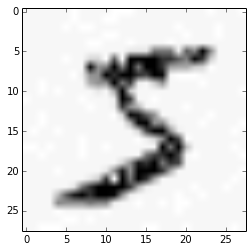

849


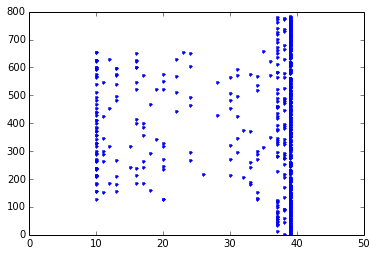

0.112337018141


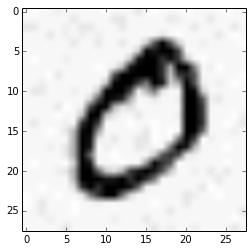

859


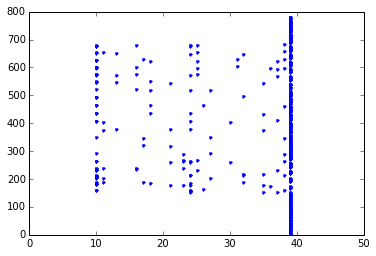

0.0117672902494


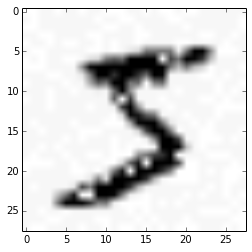

859


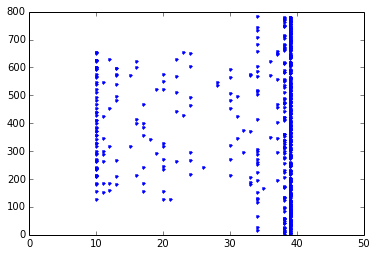

0.114050453515


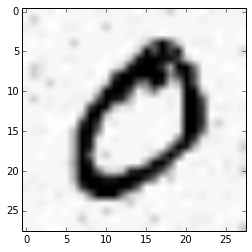

869


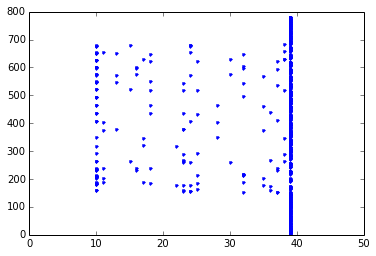

0.00332057823129


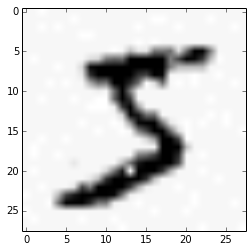

869


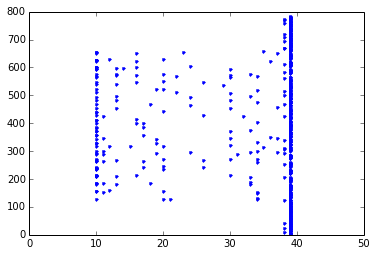

0.113117913832


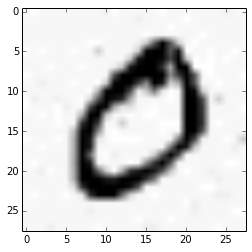

879


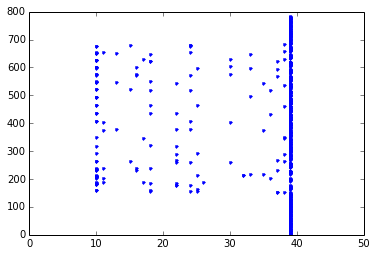

0.00407879818594


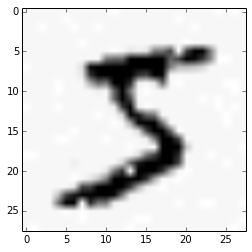

879


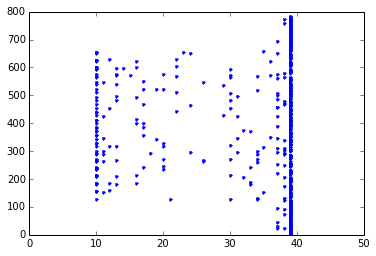

0.111689342404


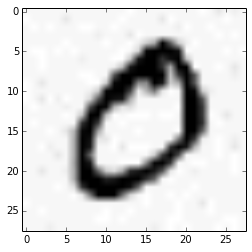

889


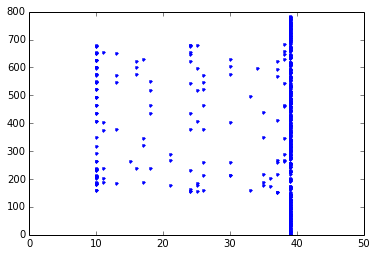

0.00406887755102


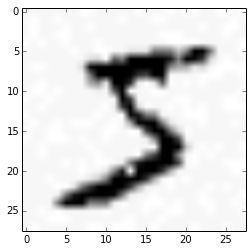

889


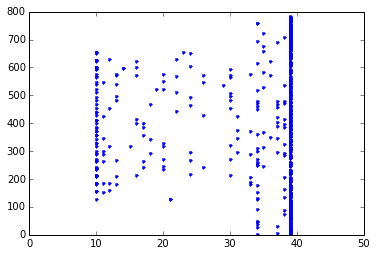

0.113939909297


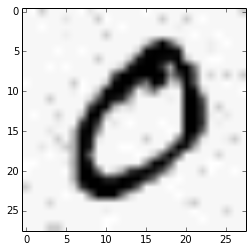

899


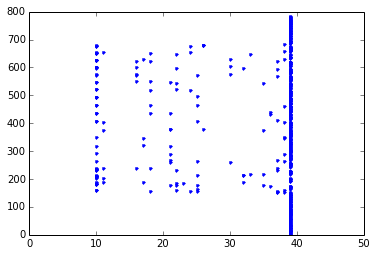

0.0101658163265


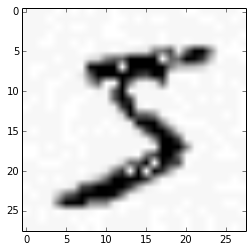

899


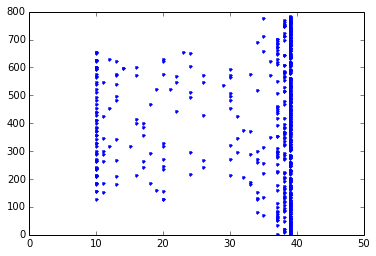

0.11539824263


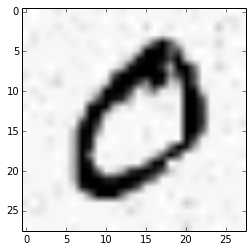

909


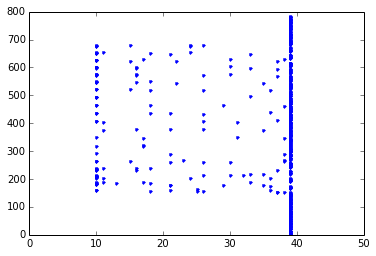

0.00115787981859


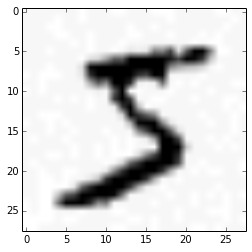

909


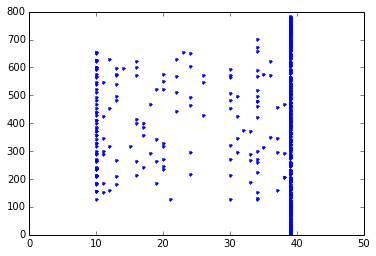

0.113048469388


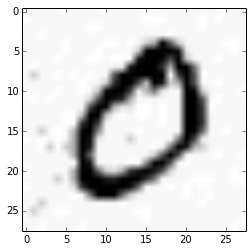

919


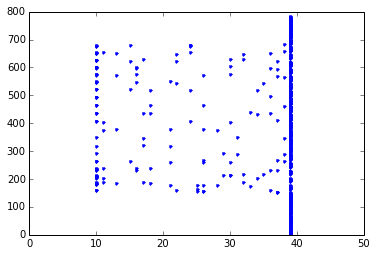

0.00280612244898


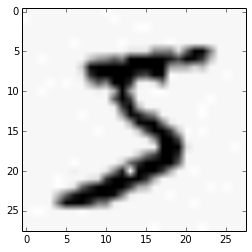

919


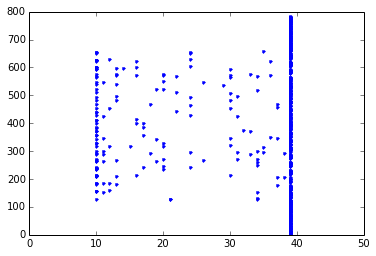

0.114770408163


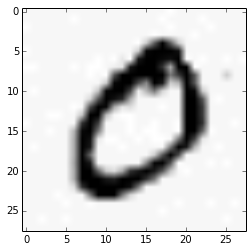

929


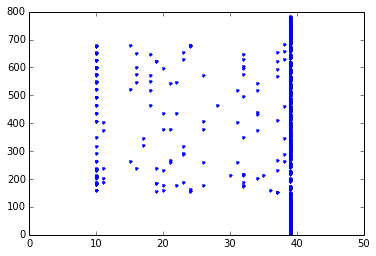

0.00380810657596


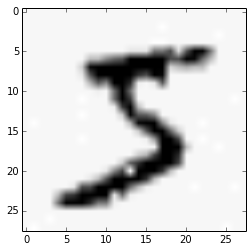

929


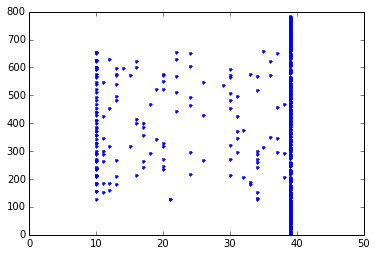

0.112294501134


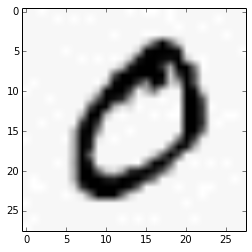

939


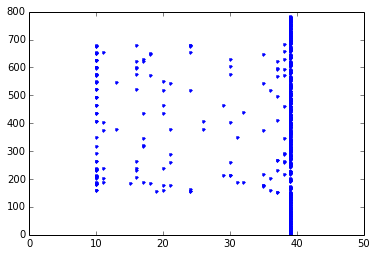

0.0034764739229


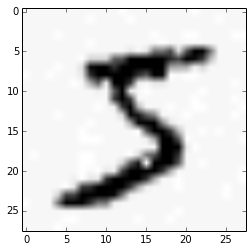

939


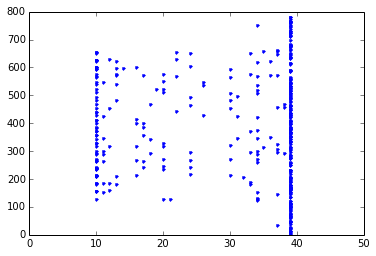

0.112714002268


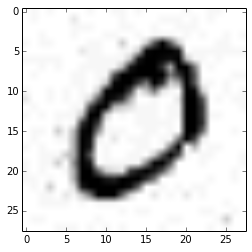

949


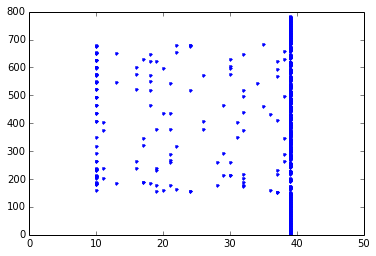

0.00518849206349


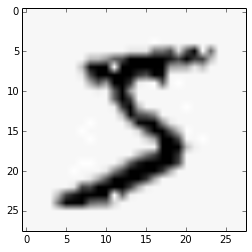

949


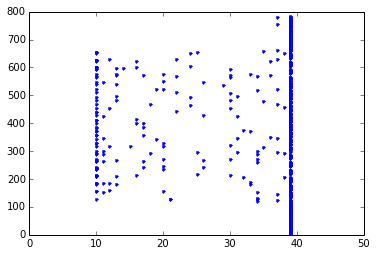

0.112315759637


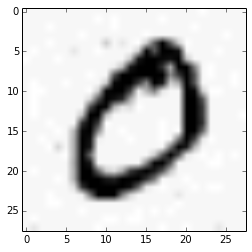

959


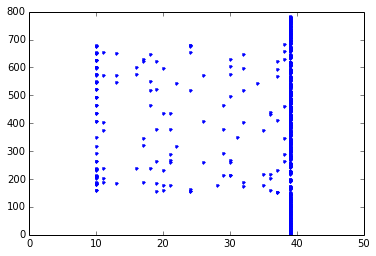

0.00460600907029


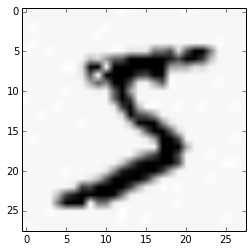

959


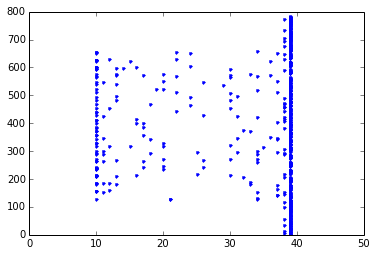

0.111690759637


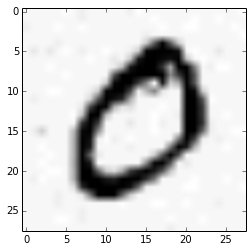

969


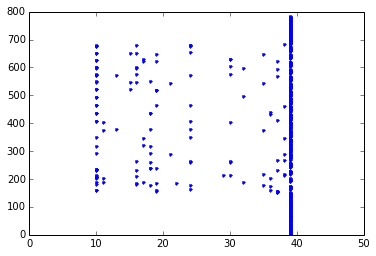

0.023147675737


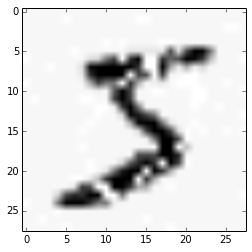

969


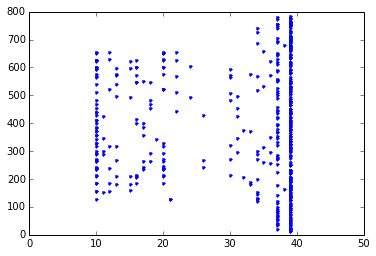

0.110547052154


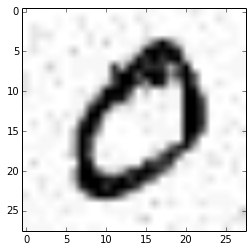

979


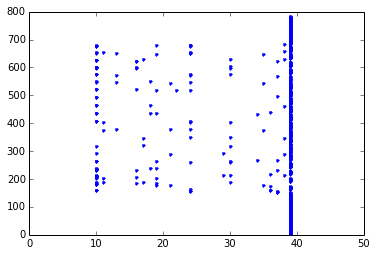

0.0128287981859


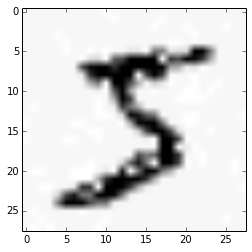

979


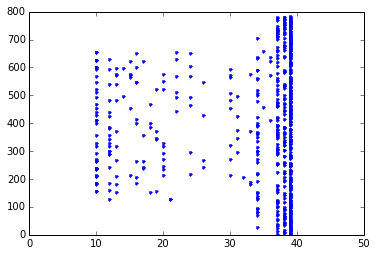

0.109508219955


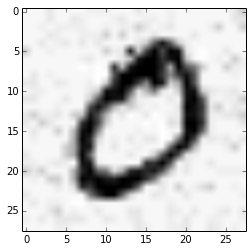

989


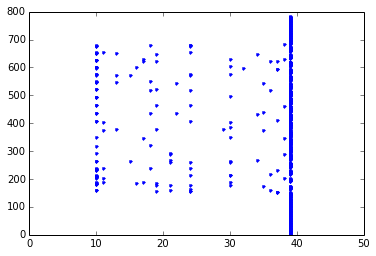

0.00398100907029


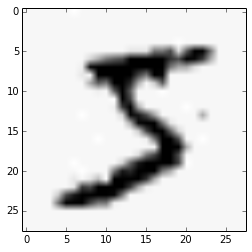

989


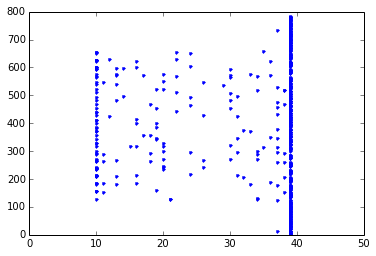

0.109702380952


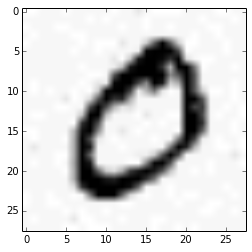

999


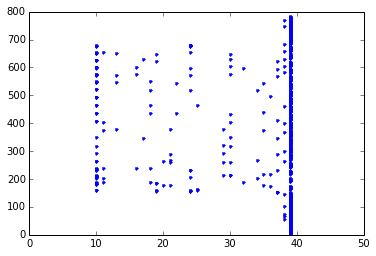

0.00429280045351


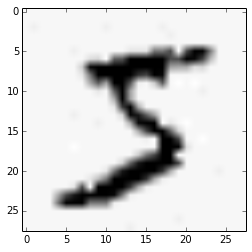

999


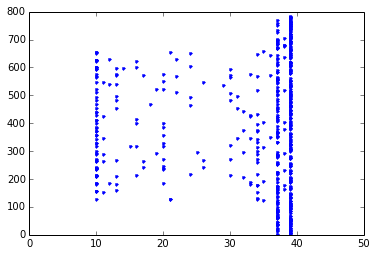

0.109611678005


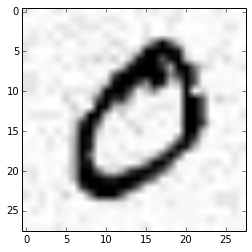

In [7]:
epoch = 1000  # training epochs

# Recording of the neural status
if record_flag:
    h_mem_list = []     # membrane potential of hiden units 
    h_spike_list = []   # spikes of hiden units 
    o_mem_list = []     # membrane potential of output units 
    o_spike_list = []   # spikes of output units 
    w_list = []         # weights

# Initialise neural status
h_spike = np.zeros((h_size, run_len))   # no output spikes from hiden units 
o_spike = np.zeros((v_size, run_len))   # no output spikes from ouput units 
h_mem = np.zeros((h_size, 1))           # membrane potential=0 mV for hiden units 
o_mem = np.zeros((v_size, 1))           # membrane potential=0 mV for output units 
nrn_decay = np.exp(-1./tau_m)
importance = 1./np.float(run_len)
for iteration in range(epoch):
    for p_id in range(patterns.shape[0]):
        # reset the neural status
        h_mem[:] = v_rest
        o_mem[:] = v_rest
        h_spike[:,:] = v_rest
        o_spike[:,:] = v_rest
        
        # the input spikes and the teaching signal
        v_spike = np.zeros((v_size, run_len))
        v_teach = np.zeros((v_size, run_len))
        
        v_pattern = np.copy(patterns[p_id,:])
        
        # add noise to the input signal
#         v_pattern += np.random.normal(0, 0.1, v_pattern.shape)
#         v_pattern[v_pattern<0] = 0
        
        v_spike[(range(v_size), v_pattern)]=1.
        v_spike[:, K]=0.
        v_teach[(range(v_size), np.array(v_pattern)+teach_delay)] = 1.
        
        # in the period of delay, nothing changed
        if record_flag:
            for t in range(delay):
                h_mem_list.append(h_mem.copy())
                h_spike_list.append(h_spike[:, t].copy())
                o_mem_list.append(o_mem.copy())
                o_spike_list.append(o_spike[:, t].copy())
                w_list.append(w.flatten())
            
        # Main part for neural status updating
        for t in range(delay,run_len):
            # hid units
            h_mem *= nrn_decay   #decay
            h_mem += np.reshape(np.dot(v_spike[:,t-delay],w),(h_mem.shape))  # add up spiking input
            h_spike[(h_mem>v_thresh)[:,0], t] = 1.  #generate spikes
            h_mem[(h_mem>v_thresh)] = v_rest        #reset membrane potential
            h_mem[(h_mem<v_rest)] = v_rest

            
            # output units
            o_mem *= nrn_decay
            o_mem += np.reshape(np.dot(h_spike[:,t-delay],np.transpose(w)),(o_mem.shape))
            o_spike[(o_mem>v_thresh)[:,0], t] = 1.
            o_mem[(o_mem>v_thresh)] = v_rest
            o_mem[(o_mem<v_rest)] = v_rest


            # t indicates the importance
            impt = np.float(run_len-t+delay)*importance
            
            # weight updates
            left_bound = max(t-tau_stdp+1-delay, 0)
            if (o_spike[:, t]>0).any() or (v_teach[:, t]>0).any():
                
                # Look the spikes of hiden units for a time period of STDP window
                temp_deltaw = np.einsum('jk,k->jk', h_spike[:, left_bound:t-delay+1], delta_w[left_bound-t+delay-1:])

            # W-
                w -= np.sum(np.einsum('i,jk->ijk', o_spike[:, t], temp_deltaw), axis=2)*impt #STDP
                w[o_spike[:, t]>0, :] -= (eta*impt*0.1) # weights decrease even without STDP
            # W+
                w += np.sum(np.einsum('i,jk->ijk', v_teach[:, t], temp_deltaw), axis=2)*impt #STDP
                w[v_teach[:, t]>0, :] += (eta*impt*0.1) # weights increase even without STDP

                w[w>w_bound] = w_bound
                w[w<-w_bound] = -w_bound
            
            if record_flag:
                h_mem_list.append(h_mem.copy())
                h_spike_list.append(h_spike[:, t].copy())
                o_mem_list.append(o_mem.copy())
                o_spike_list.append(o_spike[:, t].copy())
                w_list.append(w.flatten())
        if np.mod(iteration,10) == 9: #p_id == patterns.shape[0]-1 and 
            print iteration
            neuron_id, time_stamp = np.where(o_spike==1)
            plt.plot(time_stamp, neuron_id, '.')
            plt.xlim((0,run_len))
            plt.show()
            
            recon = o_spike.argmax(axis=1)-teach_delay
            recon = np.reshape(recon, (28,28))*1.
            recon[recon>=0] = (K-recon[recon>=0])/K
            recon[recon<0] = 0
            print ((((K-patterns)/K)[0]-recon.flatten()) ** 2).mean()
            plt.imshow(recon, cmap=cm.gray_r, clim=(0,1))
            plt.show()

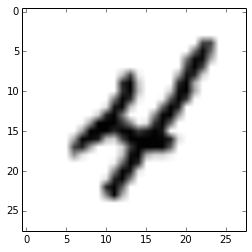

In [8]:
plt.imshow(np.reshape(train_x[9],(28,28)), cmap=cm.gray_r)

In [9]:
offset = 9900
observe = 150
def plot_dynamic(d_list, offset, title=''):
    d_list = np.array(d_list)
    d_list = np.reshape(d_list,(d_list.shape[0], d_list.shape[1]))
    plt.plot(d_list[offset:offset+observe])
    plt.title(title)
    plt.xlim((0,observe))
    plt.show()

if record_flag:
    plt.plot(range(-np.mod(offset,run_len),-np.mod(offset,run_len)+observe),np.tile(np.transpose(v_spike),(observe/run_len,1)))
    plt.ylim((-0.1,1.1))
    plt.xlim((0,observe))
    plt.title('Input Spike')
    plt.show()


    plot_dynamic(h_mem_list, offset, title='hid membrane potential')
    plot_dynamic(h_spike_list, offset, title='hid spike')

    plot_dynamic(o_mem_list, offset, title='out membrane potential')
    plot_dynamic(o_spike_list, offset, title='out spike')

    plt.plot(range(-np.mod(offset,run_len),-np.mod(offset,run_len)+observe), np.tile(np.transpose(v_teach),(observe/run_len,1)))
    plt.ylim((-0.1,1.1))
    plt.xlim((0,observe))
    plt.title('teach spike')
    plt.show()

    plot_dynamic(w_list, offset, title='weights')

In [10]:
if record_flag:
    o_spike_slot = np.array(o_spike_list[offset:offset+observe])
    time_stamp, neuron_id = np.where(o_spike_slot==1)
    plt.plot(time_stamp, neuron_id, '.')

(0, 50)

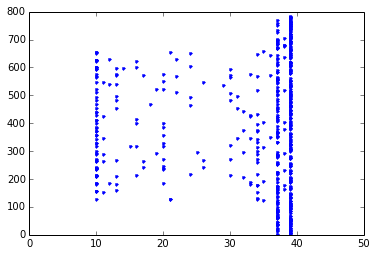

In [11]:
neuron_id, time_stamp = np.where(o_spike==1)
plt.plot(time_stamp, neuron_id, '.')
plt.xlim((0,run_len))